<a href="https://colab.research.google.com/github/DharmendraYadav96/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction**



##### **Project Type**    - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### Self Project Solution - Linear Regression (Car Dekho).ipynb  (For evaluation metrics)
##### Self Project Solution - Insurance Decisioning.ipynb (For different type of search algorithm) like gridsearchcv, bayesian cv and etc...



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Predict the bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [4]:
path = '/content/mydrive/MyDrive/Dataset/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [5]:
# Dataset First Look
df.head(10).T

0           1           2           3  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    4           5           6           7  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    8           9  
Date                       01/12/2017  01/12/2017  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

There are 8760 rows and 14 columns

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are 4 object type variables which need to be converted to numerical data type for applying machine learning algorithm.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**There is no duplicate row.**

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no missing value.**

### What did you know about your dataset?

- Dependent variable is Rented bike count.
- No. of rows 8760 and no. of columns is 14.
- No missing values in any column and No duplicated values.
- There are 4 object type variables and other are numerical type variable.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Mean value of visibility is more than than mean value of other numerical features so the data set need to normalised.

### Variables Description

- **Date**: Current date
- **Rented Bike Count**: (Dependent variable), No. of rented bike count.
- **Hour**: Hour of the day in 24hr format.
- **Temperature(°C)**: (Numerical) Temperature at the time of booking in °C.
- **Humidity(%)**: Humidity in (%).
- **Wind speed (m/s)**: (Numerical) Wind speed in (m/s).
- **Visibility (10m)**: (Numerical) visibility in (10m).
- **Dew point temperature (°C)**: (Numerical) dew point temperature in (°C).
- **Solar Radiation (MJ/m2)**: (Numerical) Solar radiation in (MJ/m2).
- **Rainfall(mm)** : (Numerical) Rainfall in (mm).
- **Snowfall (cm)** : (Numerical) Snowfall in (cm).
- **Seasons** : (Categorical) 4 seasons.
- **Holiday** : (Categorical) Yes or No
- **Functioning Day** : (Categorical) Yes or No

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df.columns:
  print(col, ": ", df[col].nunique())
  print(df[col].unique(), "\n")

Date :  365
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018

## 3. ***Data Wrangling***

### 1. Renaming column

In [13]:
df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
 'Temperature(°C)' : 'Temperature',
 'Humidity(%)' : 'Humidity',
 'Wind speed (m/s)' : 'Wind_speed',
 'Visibility (10m)' : 'Visibility',
 'Dew point temperature(°C)' : 'Dew_point_temperature',
 'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
 'Rainfall(mm)' : 'Rainfall',
 'Snowfall (cm)' : 'Snowfall',
 'Functioning Day' : 'Functioning_Day'}, inplace = True)

df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### 2. Convert date column data type to date datatype

In [14]:
# Write your code to make your dataset analysis ready.
df['Weekday'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').weekday())
df['Month'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').month)

In [15]:
# drop the date column
df.drop('Date', axis = 1, inplace = True)

In [16]:
df.head(10).T

0           1           2           3  \
Rented_Bike_Count             254         204         173         107   
Hour                            0           1           2           3   
Temperature                  -5.2        -5.5        -6.0        -6.2   
Humidity                       37          38          39          40   
Wind_speed                    2.2         0.8         1.0         0.9   
Visibility                   2000        2000        2000        2000   
Dew_point_temperature       -17.6       -17.6       -17.7       -17.6   
Solar_Radiation               0.0         0.0         0.0         0.0   
Rainfall                      0.0         0.0         0.0         0.0   
Snowfall                      0.0         0.0         0.0         0.0   
Seasons                    Winter      Winter      Winter      Winter   
Holiday                No Holiday  No Holiday  No Holiday  No Holiday   
Functioning_Day               Yes         Yes         Yes         Yes   
Weekday                         4           4           4           4   
Month                          12          12          12          12   

                                4           5           6           7  \
Rented_Bike_Count              78         100         181         460   
Hour                            4           5           6           7   
Temperature                  -6.0        -6.4        -6.6        -7.4   
Humidity                       36          37          35          38   
Wind_speed                    2.3         1.5         1.3         0.9   
Visibility                   2000        2000        2000        2000   
Dew_point_temperature       -18.6       -18.7       -19.5       -19.3   
Solar_Radiation               0.0         0.0         0.0         0.0   
Rainfall                      0.0         0.0         0.0         0.0   
Snowfall                      0.0         0.0         0.0         0.0   
Seasons                    Winter      Winter      Winter      Winter   
Holiday                No Holiday  No Holiday  No Holiday  No Holiday   
Functioning_Day               Yes         Yes         Yes         Yes   
Weekday                         4           4           4           4   
Month                          12          12          12          12   

                                8           9  
Rented_Bike_Count             930         490  
Hour                            8           9  
Temperature                  -7.6        -6.5  
Humidity                       37          27  
Wind_speed                    1.1         0.5  
Visibility                   2000        1928  
Dew_point_temperature       -19.8       -22.4  
Solar_Radiation              0.01        0.23  
Rainfall                      0.0         0.0  
Snowfall                      0.0         0.0  
Seasons                    Winter      Winter  
Holiday                No Holiday  No Holiday  
Functioning_Day               Yes         Yes  
Weekday                         4           4  
Month                          12          12

What all manipulations have you done and insights you found?

- Extract the weekday and month from the date column and then drop the date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [17]:
numerical_features = ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


### **Numerical features Analysis**

---



1. Distribution plot and boxplot of each numerical feature
2. Q-Q plot of each numerical feature
3. scatter plot wrt dependent var to check colinear relation.

#### Chart - 1

**Let us draw the distribution of each of the numerical features.**
**Check the skewness and outliers in the numerical feature**

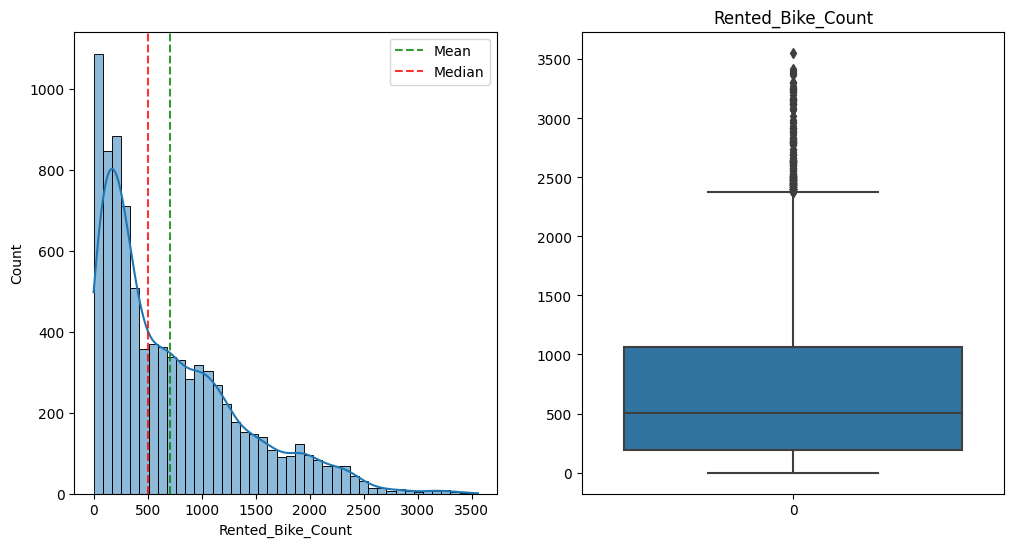

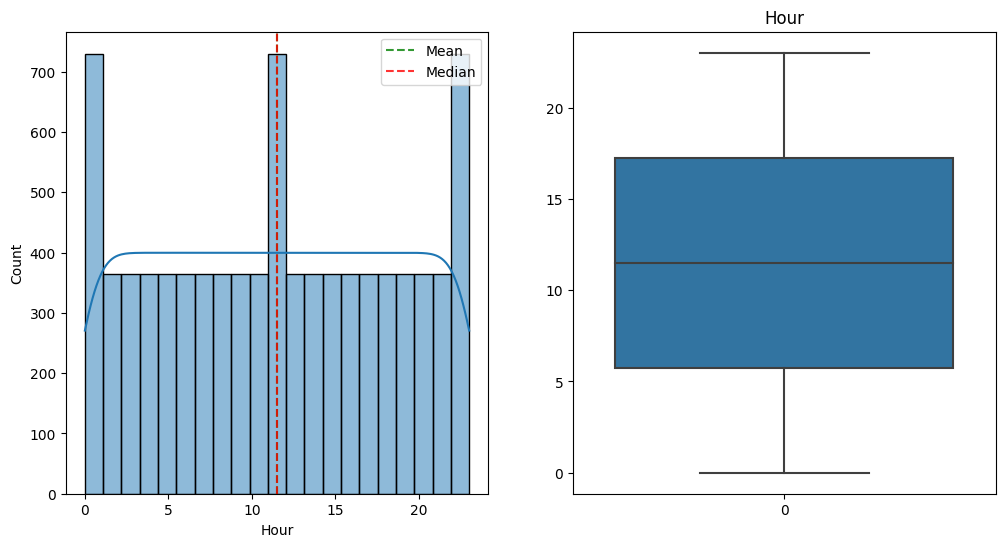

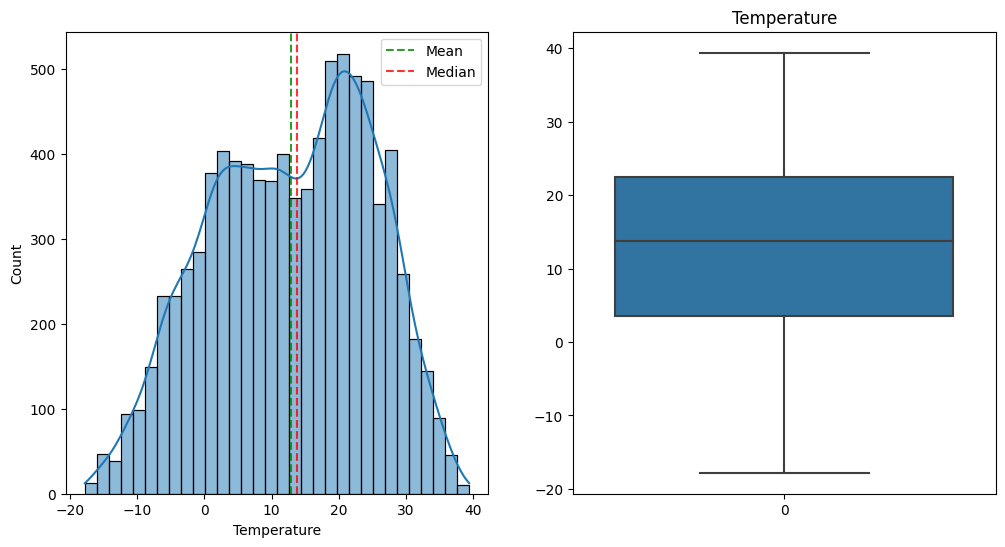

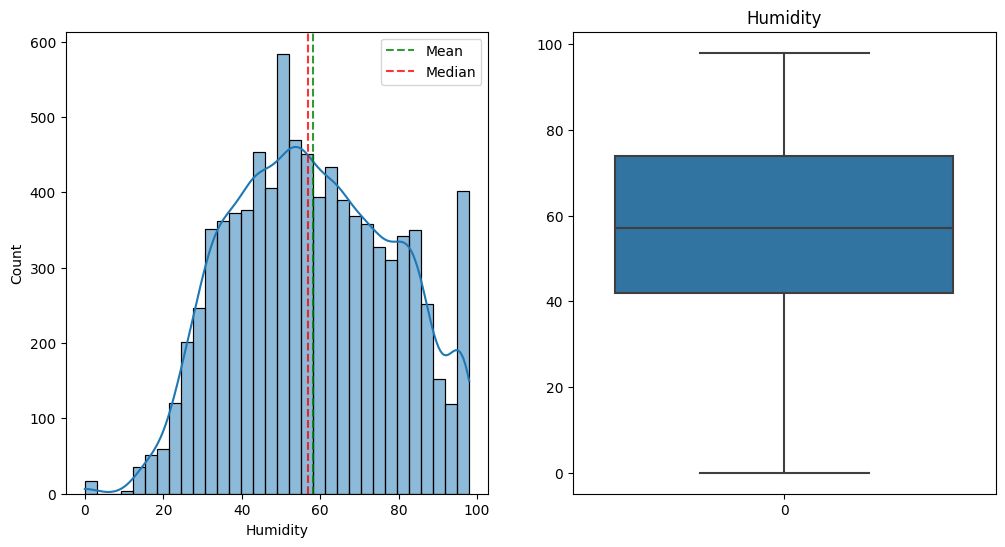

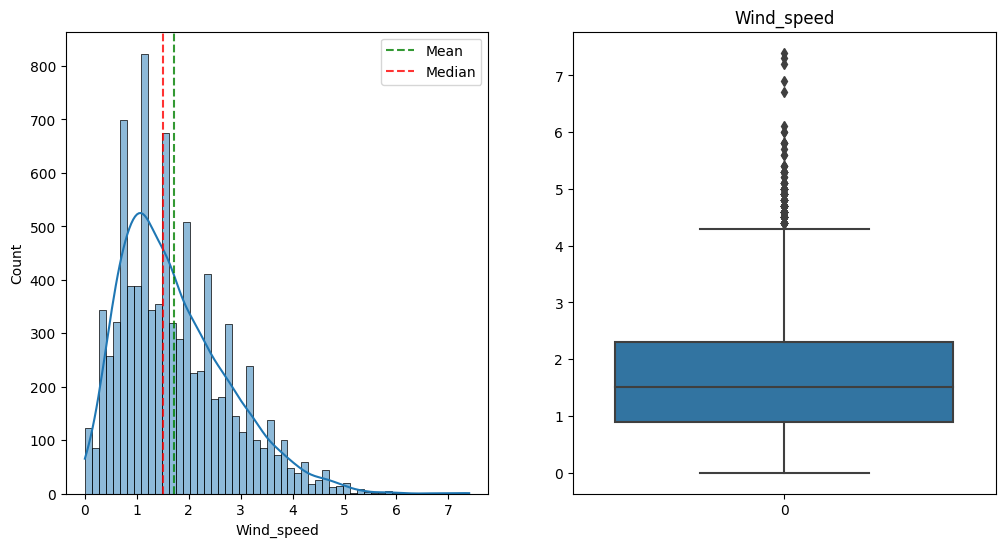

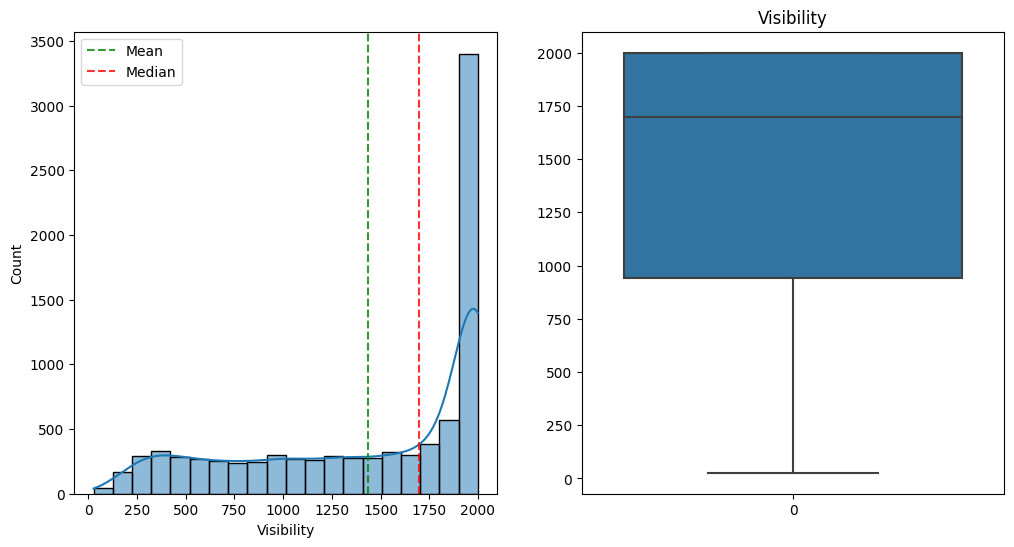

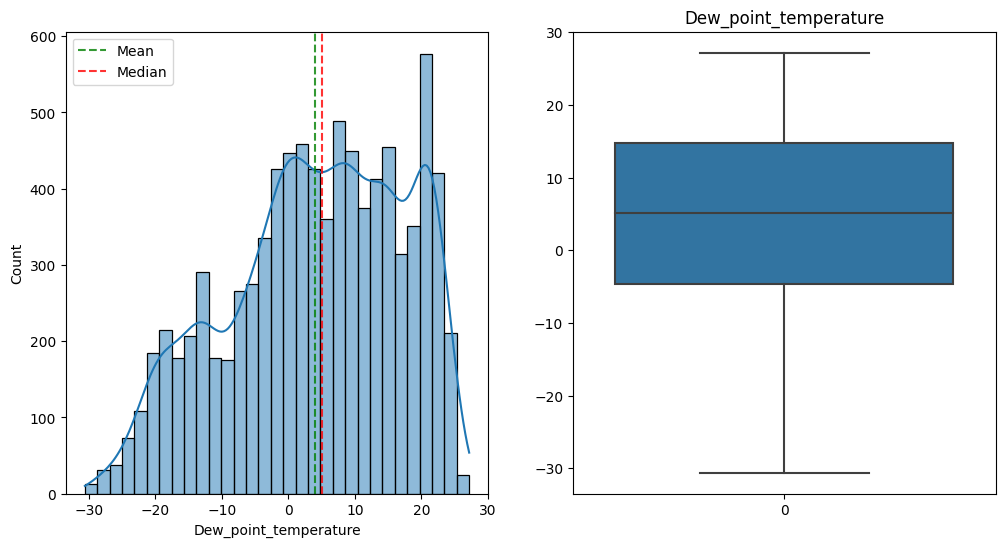

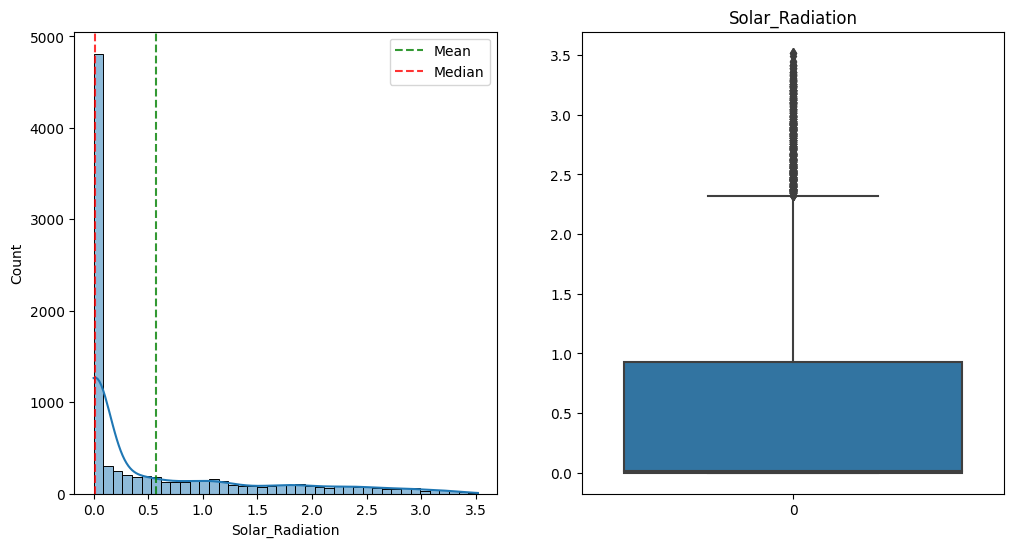

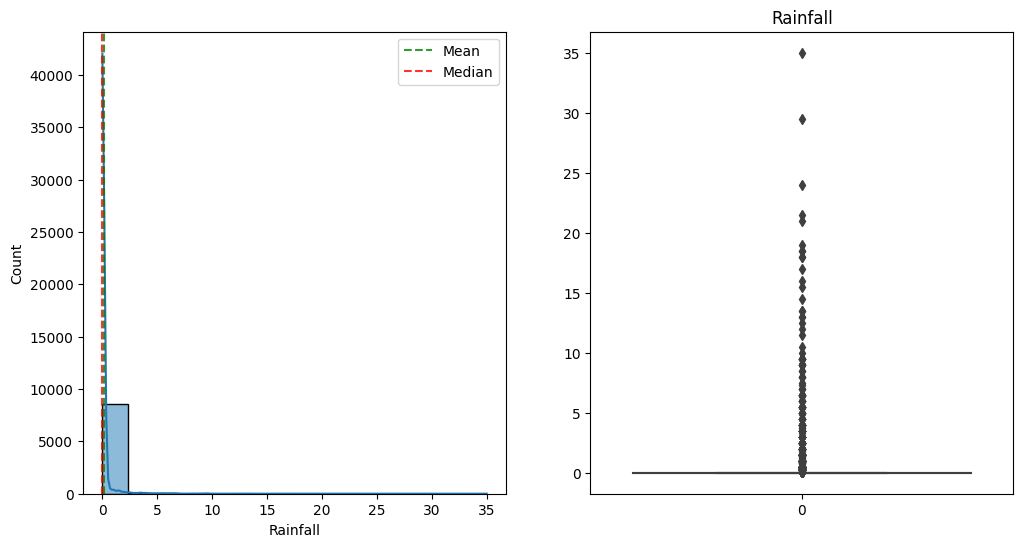

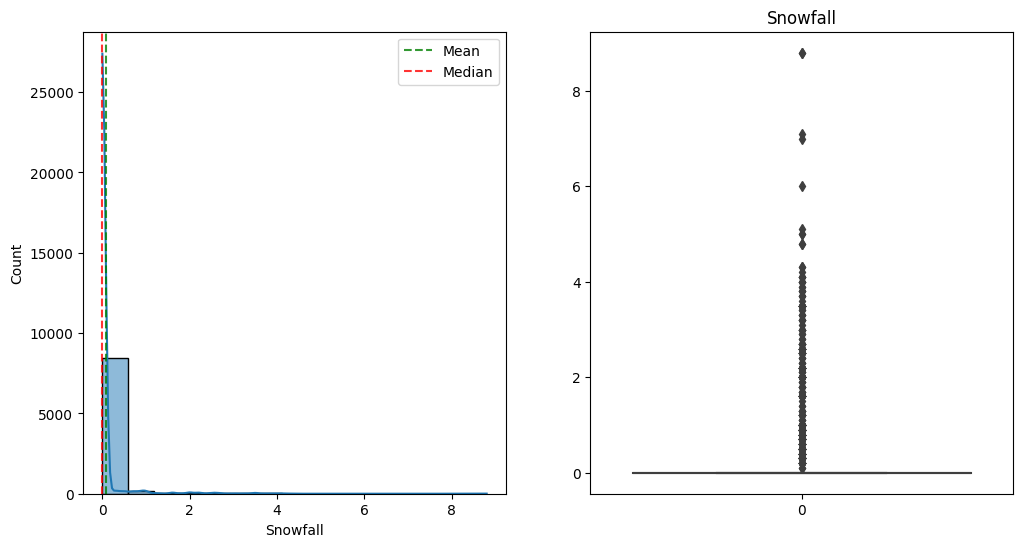

In [18]:
# Chart - 1 visualization code
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    plt.title(feat)

    # Show the plot
    plt.show()

In [ ]:
df[df['Snowfall (cm)'] > 0.5]['Snowfall (cm)'].count()

329

#####  What is/are the insight(s) found from the chart?

- Rented bike count, Wind speed, Visibility, Solar radiation and Rainfall have skewed distribution.
- Except visibility all of them has outliers.
- Snowfall and Rainfall both are having few values mostly concentrated near 0.


#### Chart - 2
#### **Q-Q Plot**

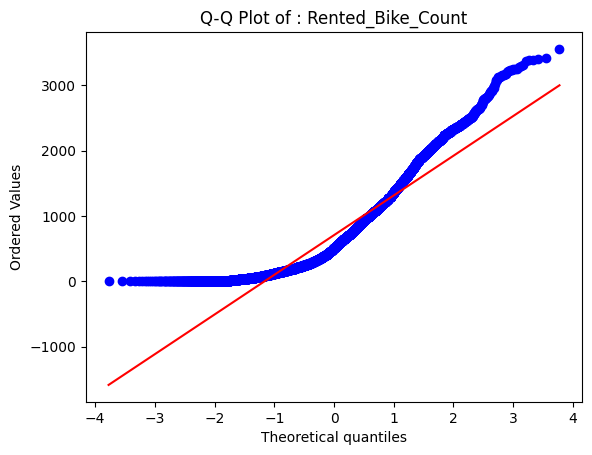

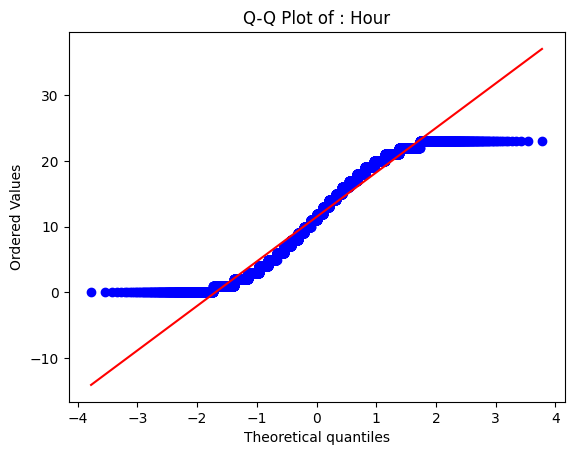

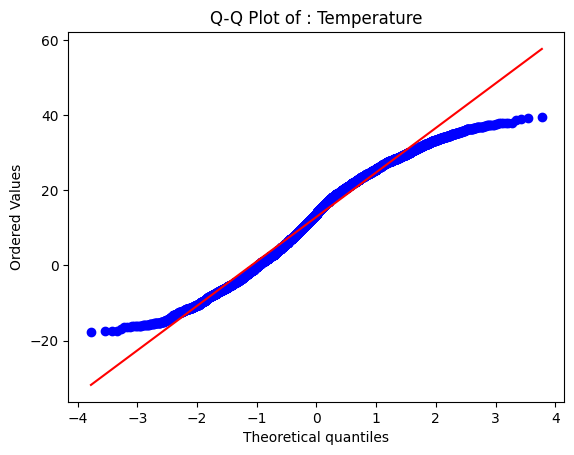

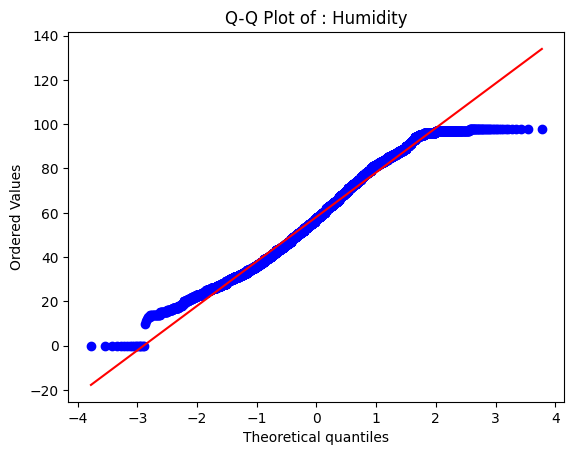

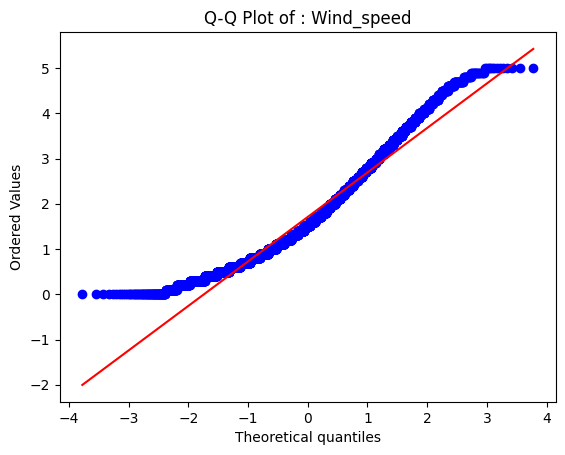

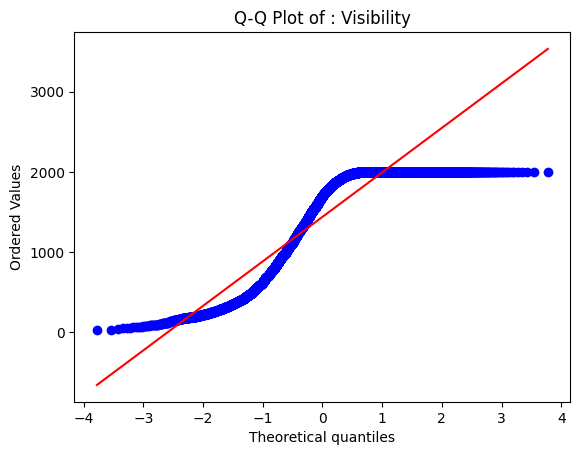

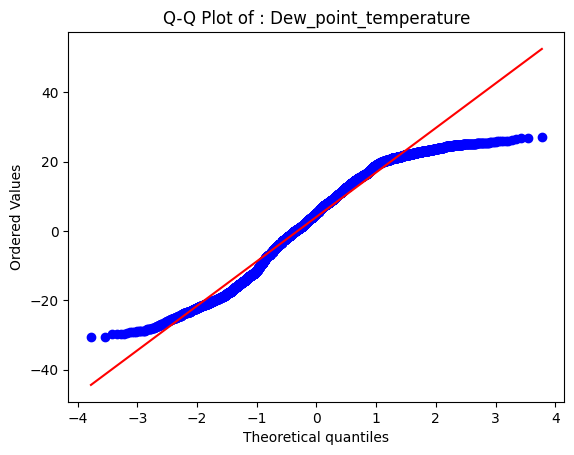

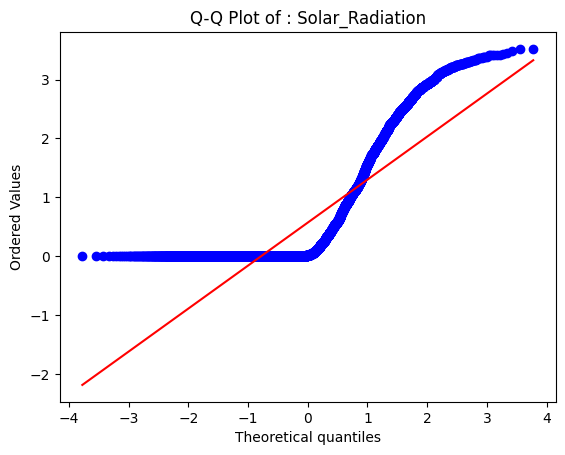

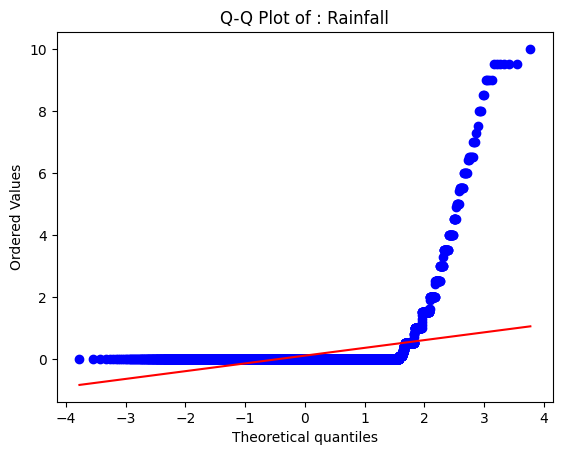

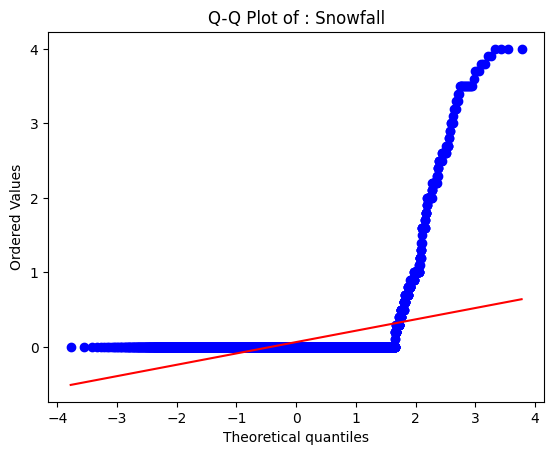

In [ ]:
# Q-Q plot for all the numerical features

for feat in numerical_features:

    # Q-Q plot
    stats.probplot(df[feat], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of : {feat}')

    # Show the plot
    plt.show()

Why did you pick the specific chart?

- Q-Q plot is plotted to know weahter our dataset is normally distributed or not.

What is/are the insight(s) found from the chart?

- Many of the features are not normally distributed.

#### Chart - 3

Let us check the linear relationship between numerical feature and Dependent variable.

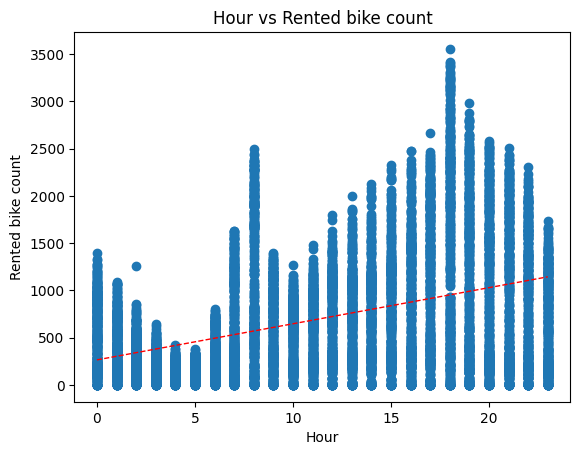

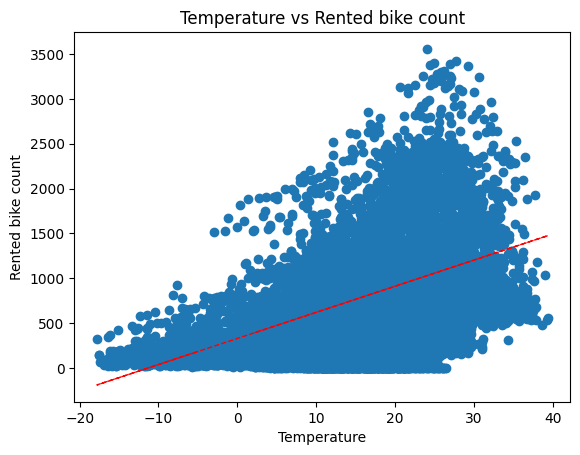

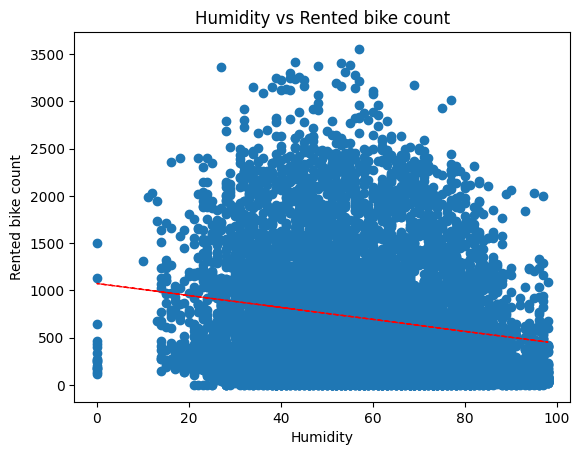

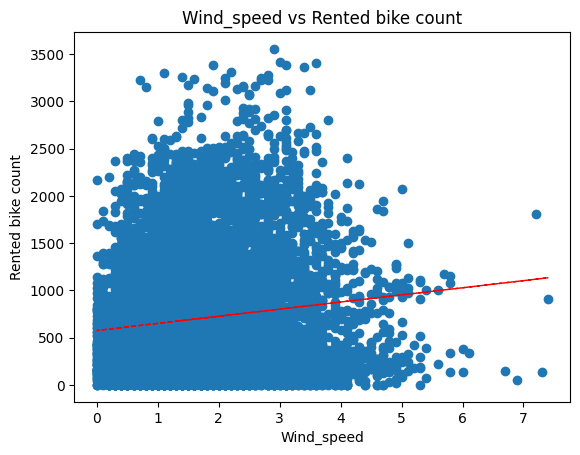

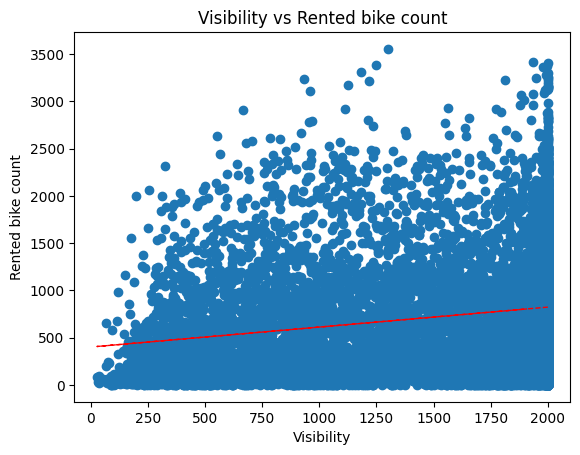

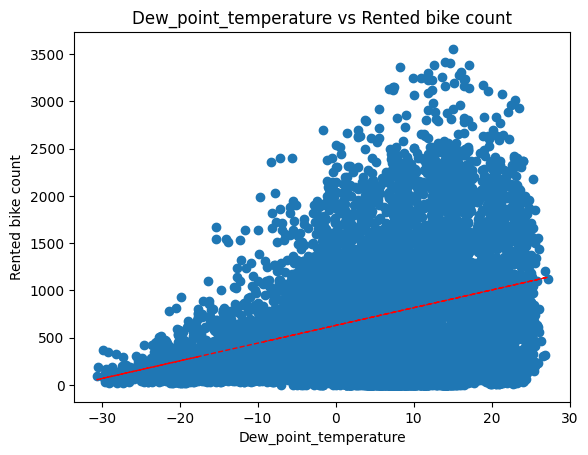

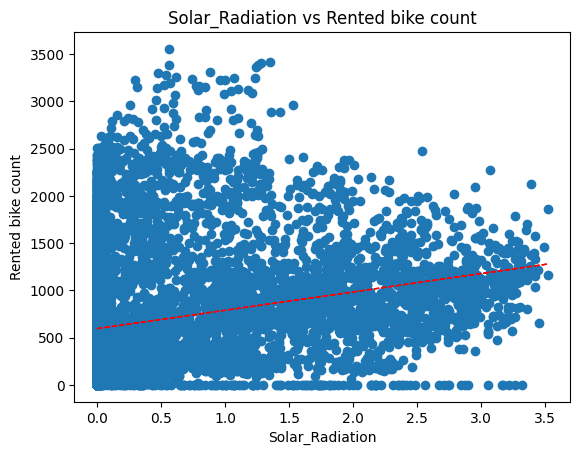

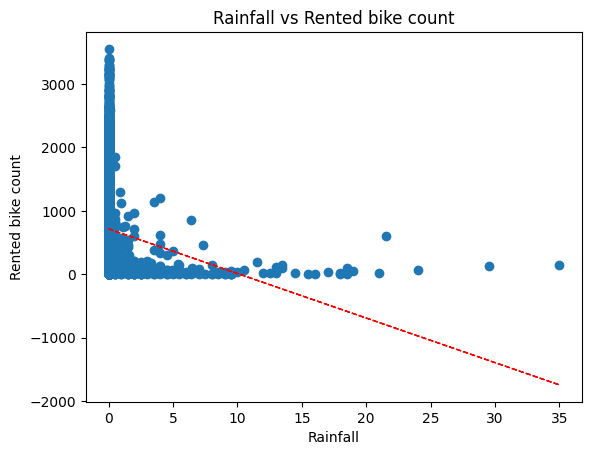

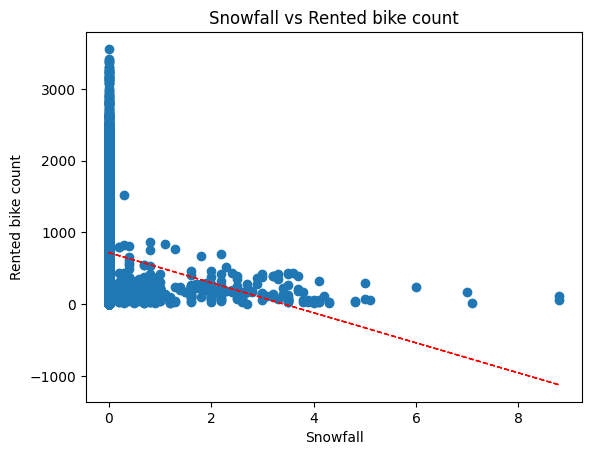

In [19]:
# Lets check the linear relationship with dependent variable. , alpha=0.5

for feat in numerical_features[1:]:

    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented_Bike_Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

In [20]:
print(df[df['Snowfall'] > 4]['Snowfall'].count())

17


In [21]:
df[df['Snowfall'] > 4]

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
224                  35     8         -0.2        90         1.2         378   
225                  31     9          0.2        90         1.0         305   
226                  19    10          0.5        91         0.4         143   
418                  36    10         -3.7        87         1.0         541   
419                  44    11         -2.9        85         1.2         243   
420                  62    12         -1.8        83         1.2         351   
421                  76    13         -0.9        84         1.2         333   
422                 116    14          0.5        76         0.9         364   
2018                 62     2          0.7        97         1.4         197   
2019                 32     3          0.9        97         1.2         243   
8601                 24     9          0.3        97         3.0          34   
8602                 62    10          0.4        97         1.8         207   
8603                114    11          1.2        97         2.3         975   
8604                167    12          2.5        84         1.9        1538   
8605                241    13          2.6        83         1.9        1774   
8606                298    14          3.0        82         1.7        1589   
8607                330    15          3.7        78         2.0        1314   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
224                    -1.6             0.00       0.0       4.1  Winter   
225                    -1.2             0.00       1.6       4.3  Winter   
226                    -0.8             0.00       0.0       4.3  Winter   
418                    -5.5             0.03       0.0       4.8  Winter   
419                    -5.0             0.06       0.0       4.8  Winter   
420                    -4.3             0.09       1.1       5.1  Winter   
421                    -3.2             0.09       0.0       5.0  Winter   
422                    -3.2             0.17       0.0       4.2  Winter   
2018                    0.2             0.00       0.0       4.1  Winter   
2019                    0.4             0.00       3.7       4.1  Winter   
8601                   -0.1             0.00       9.1       7.1  Autumn   
8602                    0.0             0.00       0.0       8.8  Autumn   
8603                    0.7             0.07       0.0       8.8  Autumn   
8604                    0.0             0.40       1.8       7.0  Autumn   
8605                    0.0             0.84       0.0       6.0  Autumn   
8606                    0.2             0.55       0.0       5.0  Autumn   
8607                    0.2             0.81       0.0       4.1  Autumn   

         Holiday Functioning_Day  Weekday  Month  
224   No Holiday             Yes        6     12  
225   No Holiday             Yes        6     12  
226   No Holiday             Yes        6     12  
418   No Holiday             Yes        0     12  
419   No Holiday             Yes        0     12  
420   No Holiday             Yes        0     12  
421   No Holiday             Yes        0     12  
422   No Holiday             Yes        0     12  
2018  No Holiday             Yes        4      2  
2019  No Holiday             Yes        4      2  
8601  No Holiday             Yes        5     11  
8602  No Holiday             Yes        5     11  
8603  No Holiday             Yes        5     11  
8604  No Holiday             Yes        5     11  
8605  No Holiday             Yes        5     11  
8606  No Holiday             Yes        5     11  
8607  No Holiday             Yes        5     11

In [22]:
#  'Snowfall (cm)'
df[df['Rainfall'] > 10]['Rainfall'].count()

22

In [23]:
df[df['Rainfall'] > 10]

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
2505                 32     9         14.1        98         1.1         253   
3997                151    13         21.8        97         2.4         682   
4012                 51     4         19.2        98         2.4        1965   
4016                152     8         19.7        98         0.5        1958   
4028                 17    20         21.3        97         2.8         388   
4687                 94     7         19.4        97         0.9         272   
4688                187     8         18.9        97         1.2         492   
4708                 72     4         18.0        93         1.6         627   
4979                 11    11         20.4        97         1.4         129   
4981                 24    13         20.5        97         1.2         338   
5034                596    18         20.6        97         0.7         222   
5098                 13    10         21.6        97         0.5         266   
5099                 11    11         21.2        97         1.2         105   
5132                 61    20         23.5        97         0.1        1814   
6498                 96    18         24.3        97         0.8         105   
6500                 10    20         23.3        97         3.3         183   
6501                122    21         22.9        98         2.1        1146   
6524                 19    20         23.4        98         0.6          70   
6641                 23    17         22.7        96         4.9         452   
6642                113    18         21.9        97         1.8         757   
8229                 21    21         14.0        96         4.1         292   
8232                  0     0         12.0        96         3.1        1185   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
2505                   13.7             0.06      17.0       0.0  Spring   
3997                   21.2             0.06      35.0       0.0  Spring   
4012                   18.8             0.00      19.0       0.0  Spring   
4016                   19.3             0.12      13.5       0.0  Spring   
4028                   20.7             0.00      12.5       0.0  Spring   
4687                   18.9             0.00      13.5       0.0  Summer   
4688                   18.4             0.06      11.5       0.0  Summer   
4708                   16.8             0.00      10.5       0.0  Summer   
4979                   19.9             0.09      16.0       0.0  Summer   
4981                   20.0             0.11      14.5       0.0  Summer   
5034                   20.1             0.14      21.5       0.0  Summer   
5098                   21.0             0.13      12.0       0.0  Summer   
5099                   20.6             0.15      18.5       0.0  Summer   
5132                   22.9             0.04      24.0       0.0  Summer   
6498                   23.7             0.01      18.5       0.0  Summer   
6500                   22.7             0.00      15.5       0.0  Summer   
6501                   22.5             0.00      29.5       0.0  Summer   
6524                   23.0             0.00      21.0       0.0  Summer   
6641                   22.0             0.07      13.0       0.0  Autumn   
6642                   21.3             0.02      13.0       0.0  Autumn   
8229                   13.3             0.00      18.0       0.0  Autumn   
8232                   11.3             0.00      18.0       0.0  Autumn   

         Holiday Functioning_Day  Weekday  Month  
2505  No Holiday             Yes        3      3  
3997  No Holiday             Yes        2      5  
4012  No Holiday             Yes        3      5  
4016  No Holiday             Yes        3      5  
4028  No Holiday             Yes        3      5  
4687  No Holiday             Yes        3      6  
4688  No Holiday             Yes        3      6  
4708  No

In [24]:
df[df['Wind_speed'] > 5]['Wind_speed'].count()

35

In [25]:
df[df['Wind_speed'] > 5]

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
85                  391    13          0.0        30         5.4        1938   
87                  341    15         -0.1        25         5.8        2000   
89                  515    17         -1.3        26         5.3        2000   
249                 326     9         -5.9        36         5.1        1941   
253                 241    13         -5.4        32         5.1        1986   
933                 146    21          0.7        77         6.7         692   
974                 177    14         -5.3        37         5.3        2000   
1309                140    13        -12.0        25         6.0        1887   
1409                178    17         -3.8        32         5.2        2000   
1722                216    18         -2.0        15         5.6        2000   
1723                151    19         -3.1        14         5.1        2000   
1724                132    20         -4.4        19         5.8        2000   
1791                295    15          3.7        40         5.3        1950   
2170                191    10          0.1        53         5.3        1022   
2174                375    14          1.2        36         6.0        1430   
2177                423    17          0.4        37         5.2        1366   
3042               1114    18          5.9        43         5.3         859   
3065                908    17          7.6        36         5.3        2000   
3133                967    13         21.9        34         5.1        1861   
3134                913    14         21.2        35         7.4        1992   
3136               1080    16         20.9        34         5.8        2000   
3137               1004    17         20.6        39         5.6        2000   
3138               1805    18         19.7        52         7.2        2000   
3139               1153    19         19.2        55         5.8        2000   
3140                336    20         19.1        58         6.1        2000   
3141                133    21         17.5        70         7.3        1634   
3142                 75    22         15.8        83         5.4         691   
3181               1029    13         18.1        18         5.1        1939   
3712               1501    16         18.6        30         5.1        1891   
4188               1087    12         22.1        36         5.3        1696   
6316                 49     4         25.3        70         6.9         925   
6687               1131    15         28.1        43         5.1        1929   
7916               1003    20         12.2        67         5.4        1956   
7937               1176    17          9.5        34         5.7        2000   
8245                  0    13         14.0        46         5.3         927   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
85                    -15.5             1.17       0.0       0.0  Winter   
87                    -17.8             0.88       0.0       0.0  Winter   
89                    -18.3             0.18       0.0       0.0  Winter   
249                   -18.6             0.10       0.0       0.0  Winter   
253                   -19.5             1.24       0.0       0.0  Winter   
933                    -2.8             0.00       0.9       1.0  Winter   
974                   -17.7             1.05       0.0       0.3  Winter   
1309                  -28.0             1.27       0.0       0.9  Winter   
1409                  -18.1             0.25       0.0       0.0  Winter   
1722                  -25.2             0.13       0.0       0.0  Winter   
1723                  -26.9             0.00       0.0       0.0  Winter   
1724                  -24.6             0.00       0.0       0.0  Winter   
1791                   -8.6             1.96       0.0       0.0  Winter   
2170                   -8.3             1.12       0.0       

In [26]:
df = df.drop(df[df['Snowfall'] > 4].index, axis=0)
df = df.drop(df[df['Rainfall'] > 10].index, axis=0)
df = df.drop(df[df['Wind_speed'] > 5].index, axis=0)

##### 1. Why did you pick the specific chart?

- To check the linear relationship between feature and  Rented bike count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### NEW CHART

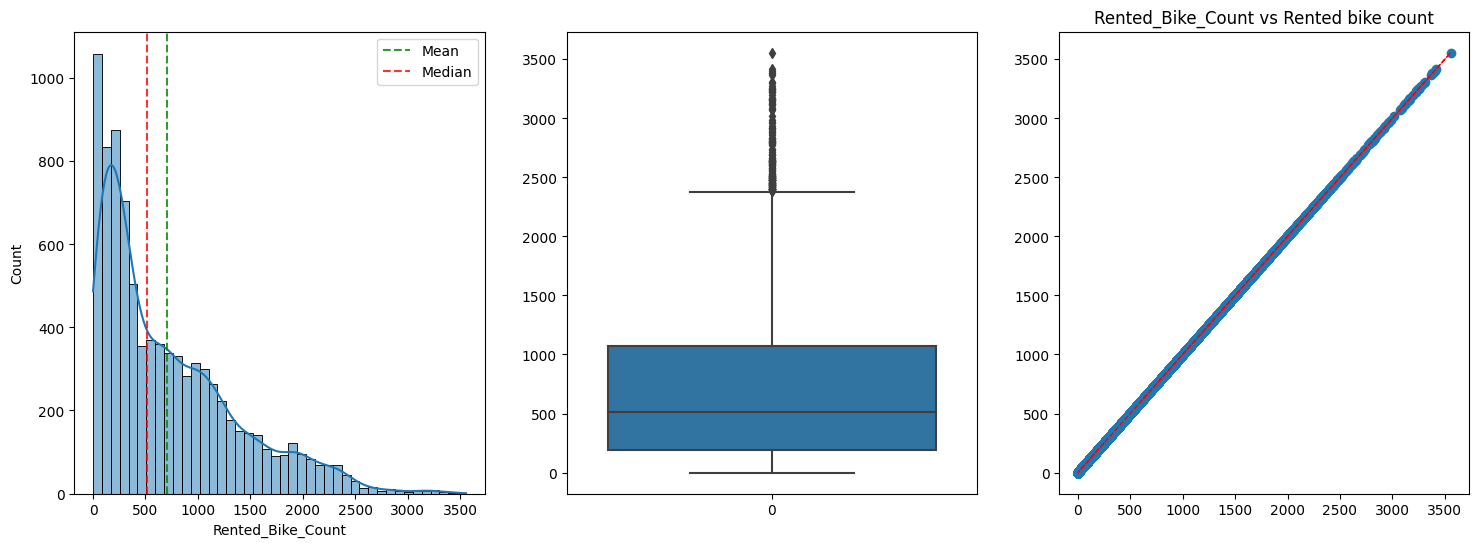

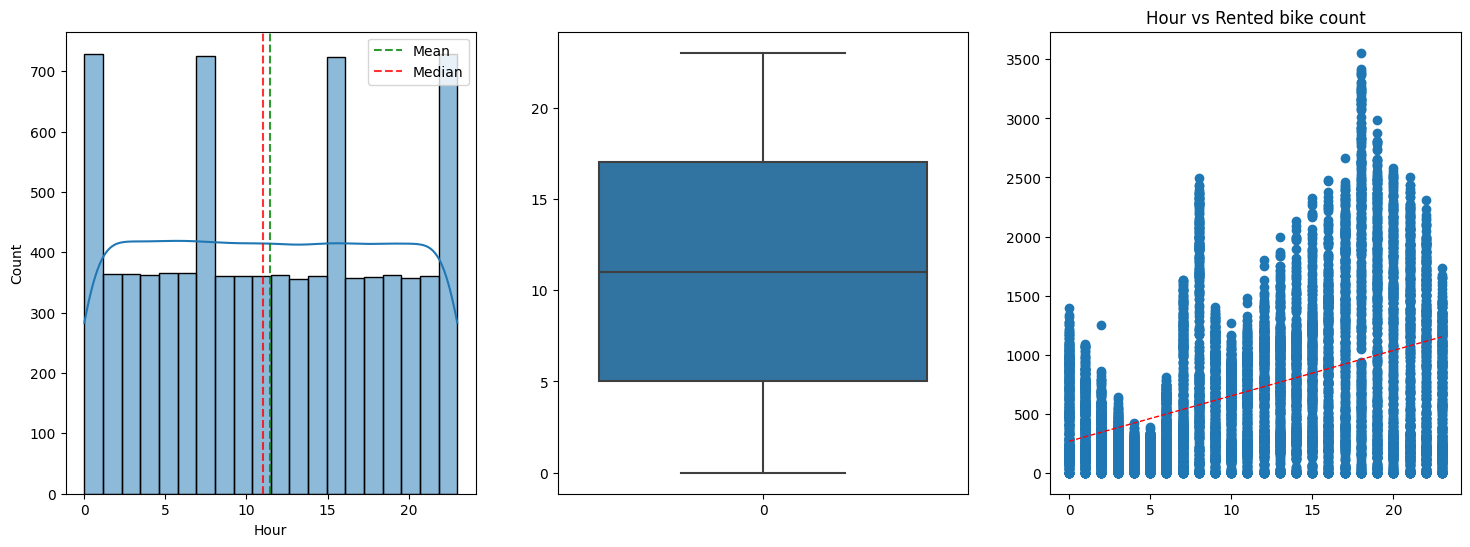

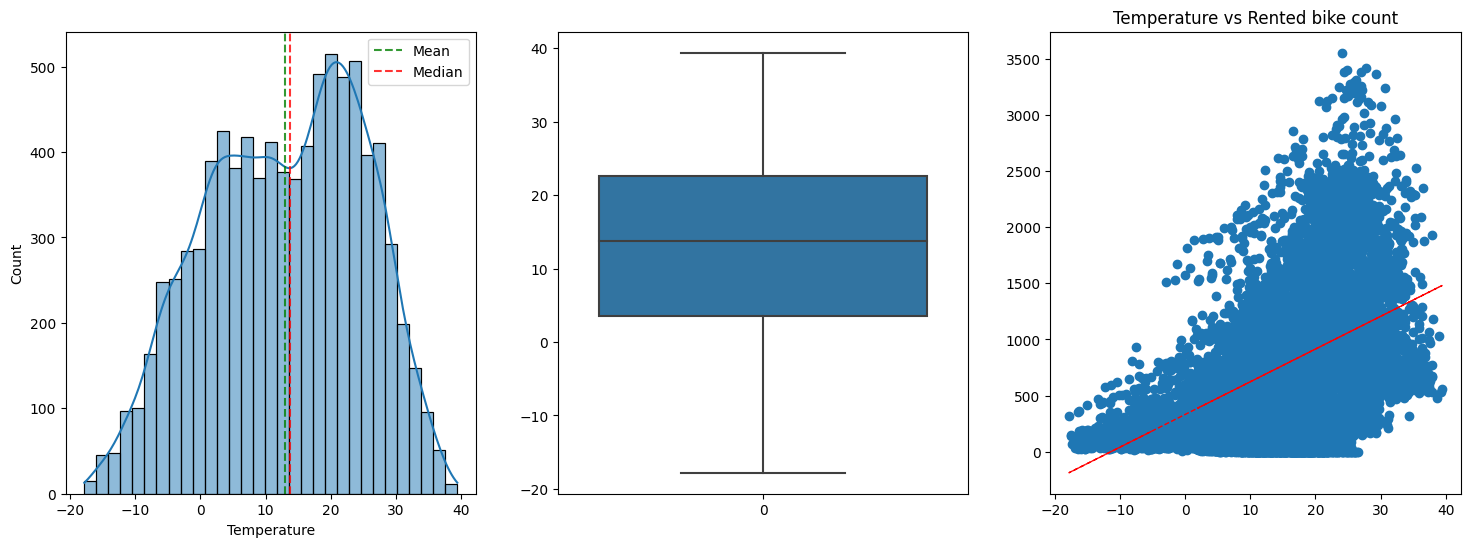

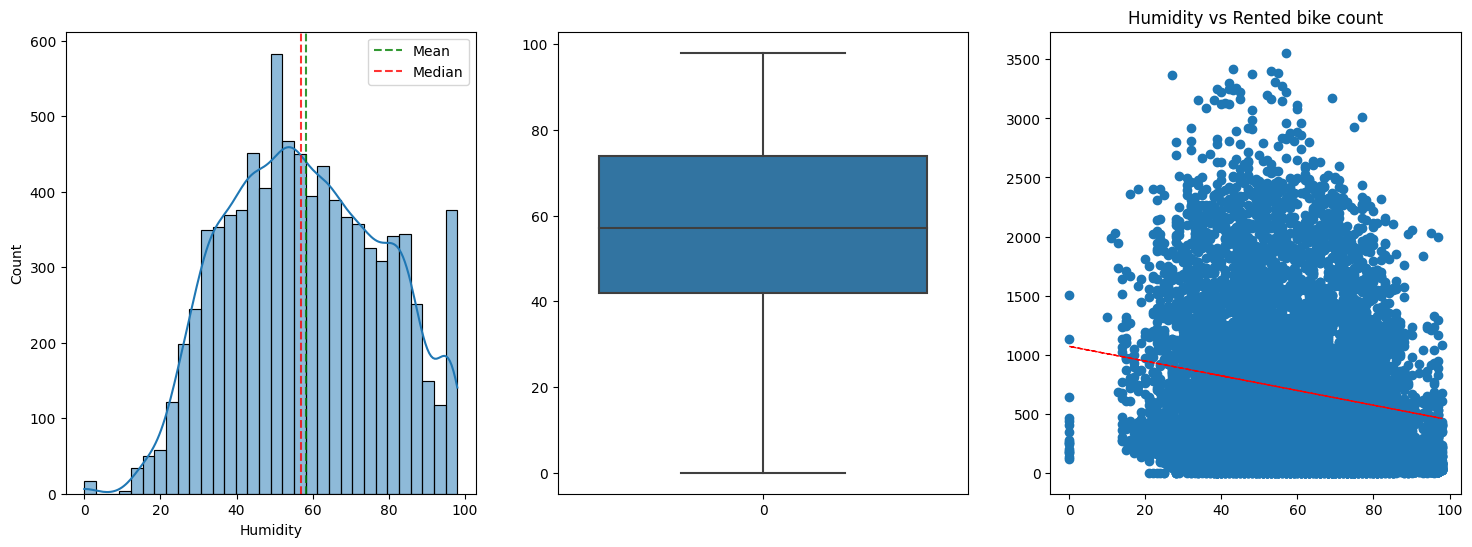

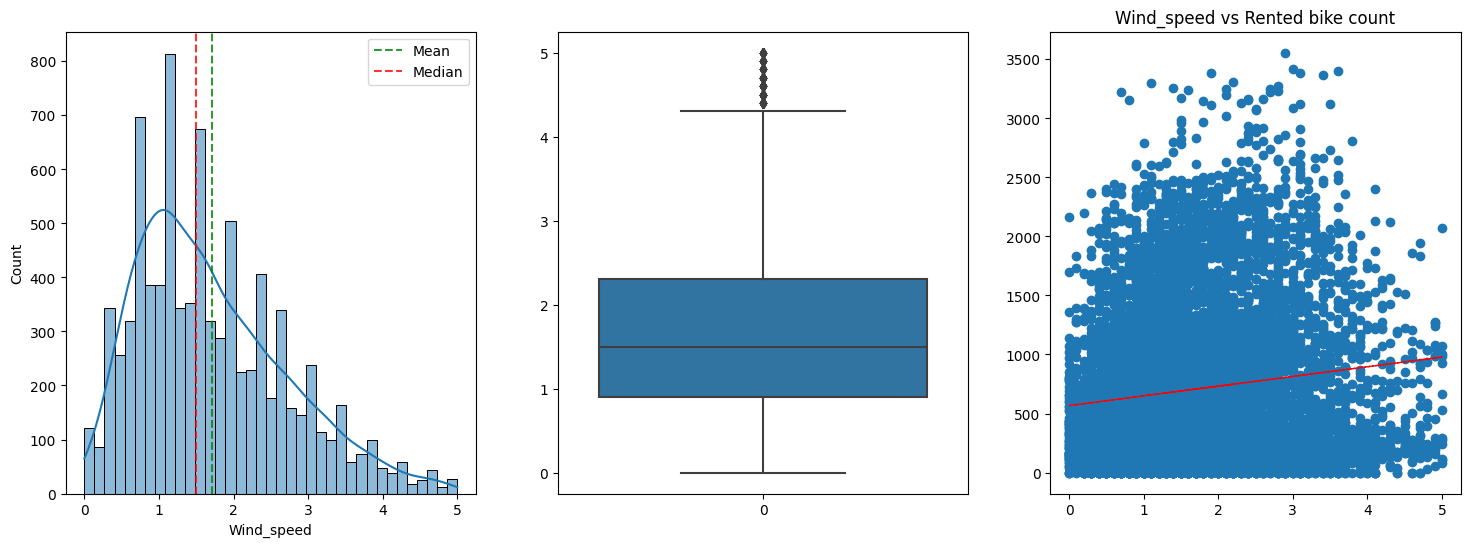

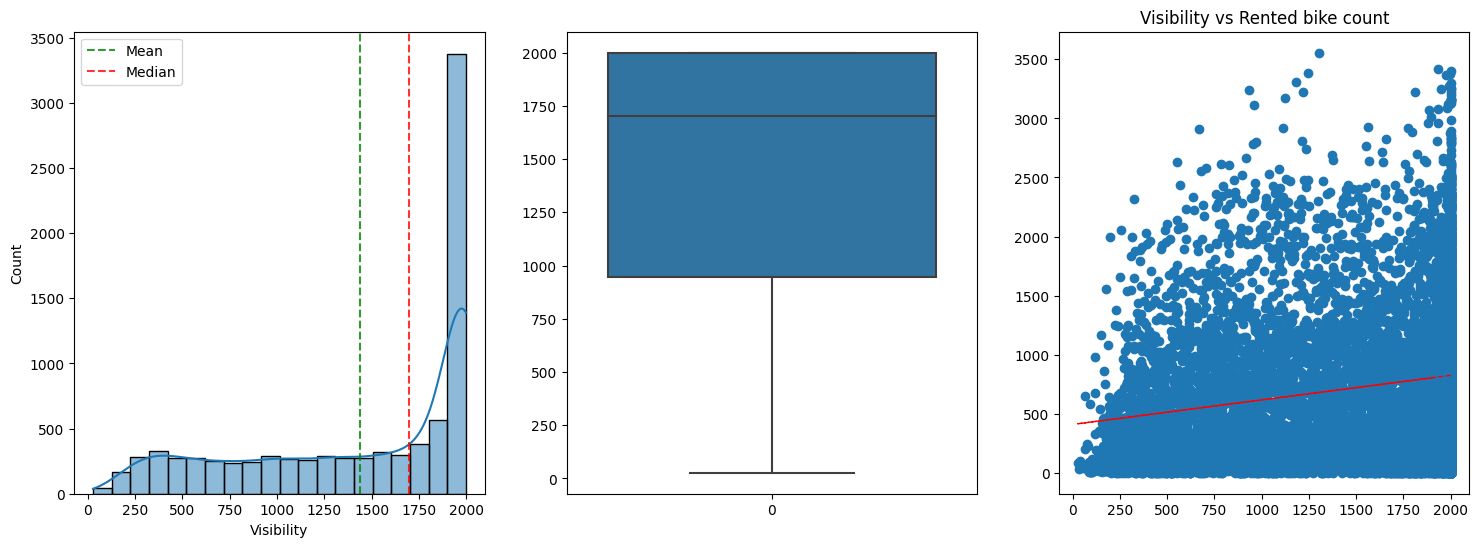

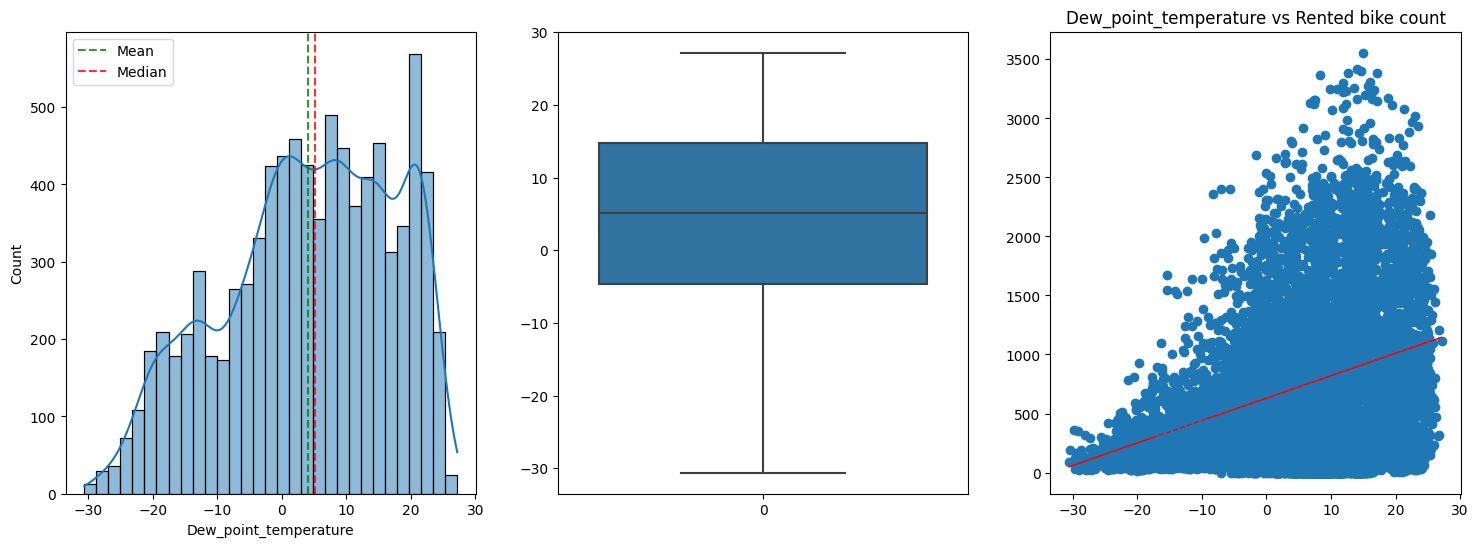

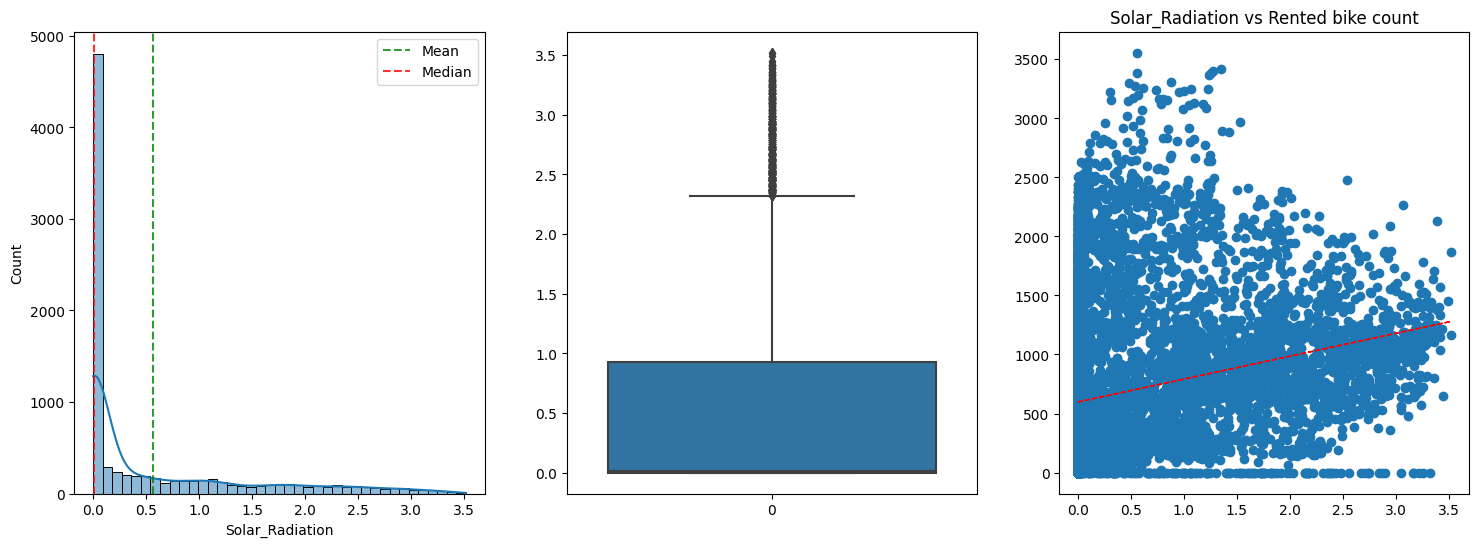

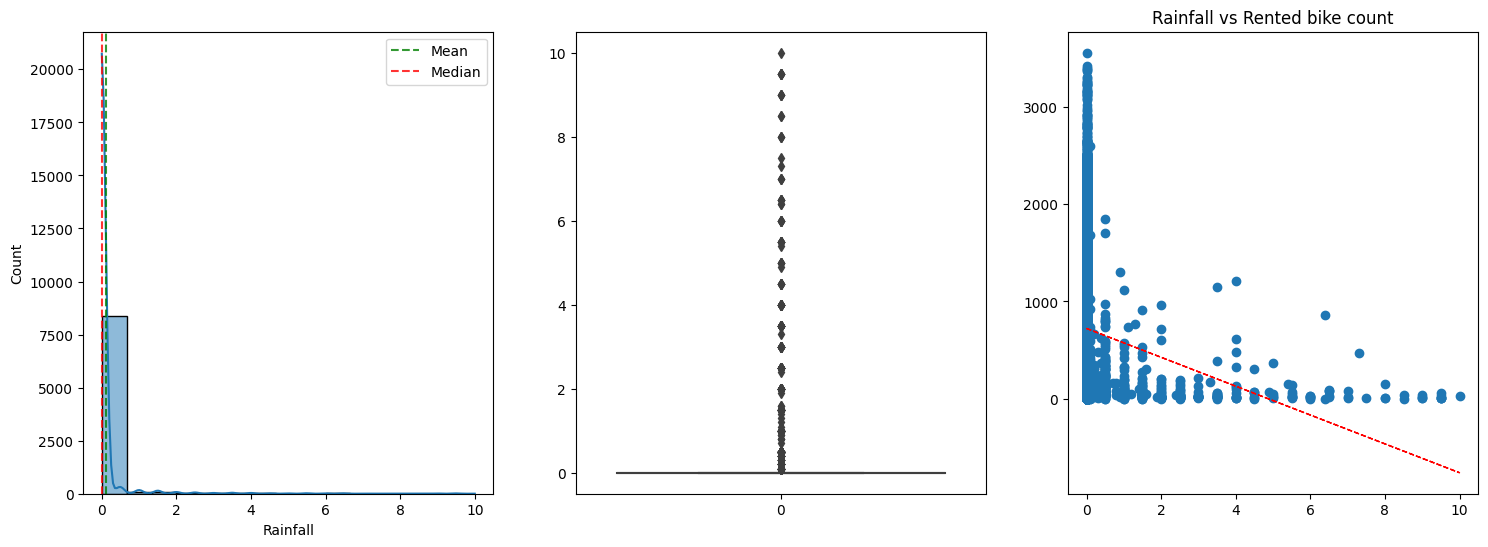

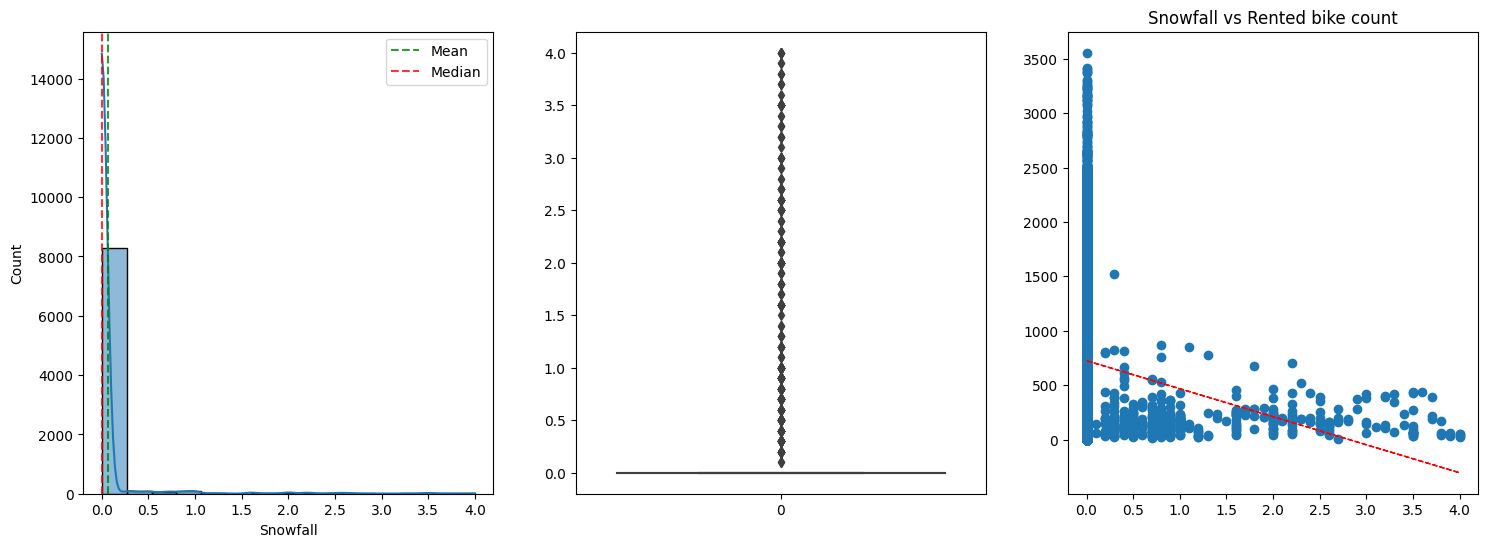

In [29]:
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    plt.title(feat)

    # Subplot 3: Scatter plot
    axs[2].scatter(x = df[feat], y = df['Rented_Bike_Count'])
    # axs[2].xlabel(feat)
    # axs[2].ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    axs[2].plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    axs[2].set_title(feat + ' vs ' + 'Rented bike count')
    # Show the plot
    plt.show()

### **Categorical features Analysis**

---



1. Barplot wrt to dependent var
2. Boxplot wrt to dependent var
3. scatter plot wrt dependent var to check colinear relation.

In [ ]:
# seprating categorical features
categorical_features = set(df.columns) - set(numerical_features)
categorical_features

{'Functioning Day', 'Holiday', 'Month', 'Seasons', 'Weekday'}

#### **1. Barplot wrt to dependent var**

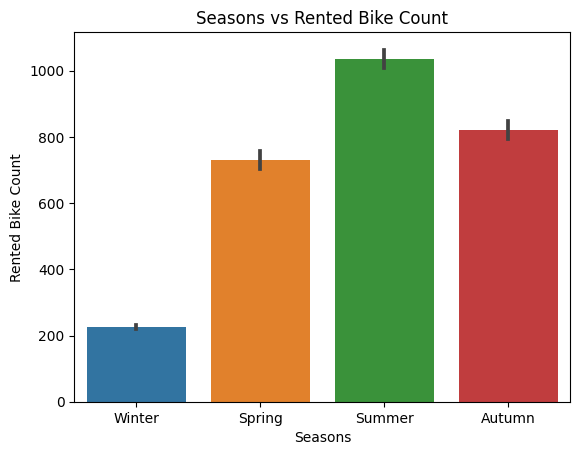

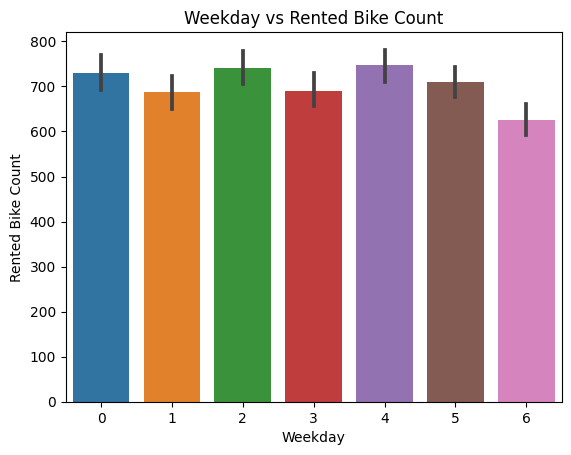

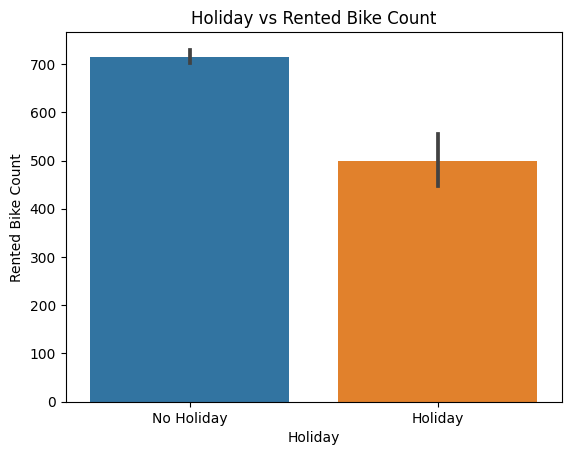

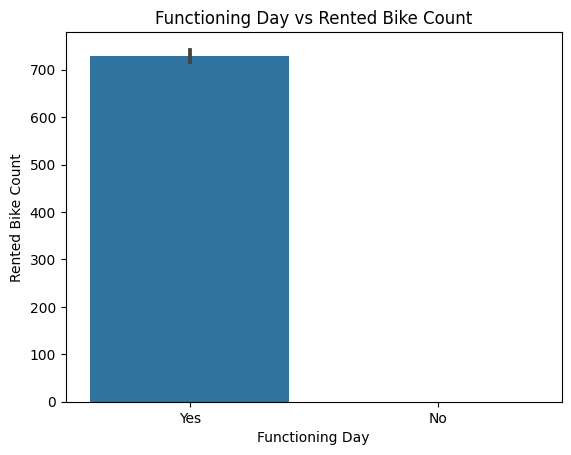

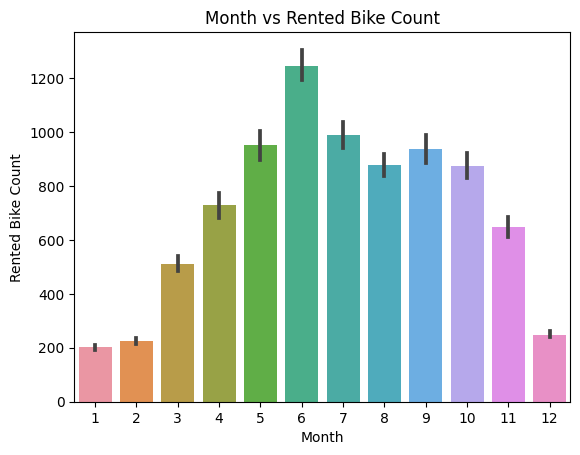

In [ ]:
# Chart - 5 visualization code
for feat in categorical_features:

    # Subplot 2: Boxplot
    sns.barplot(x = df[feat], y = df['Rented Bike Count'])
    plt.title(f'{feat} vs Rented Bike Count')

    # Show the plot
    plt.show()

##### 1. Why did you pick the specific chart?

- Barplot is picked to see the dependency of dependent variable and categorical featrues.

##### 2. What is/are the insight(s) found from the chart?

- All the features has impact on the dependent variable.
- We need to figure out weather the weekday is important feature to be added or not as functioning day and Holiday are already given.





#### **2. Boxplot wrt to dependent var**

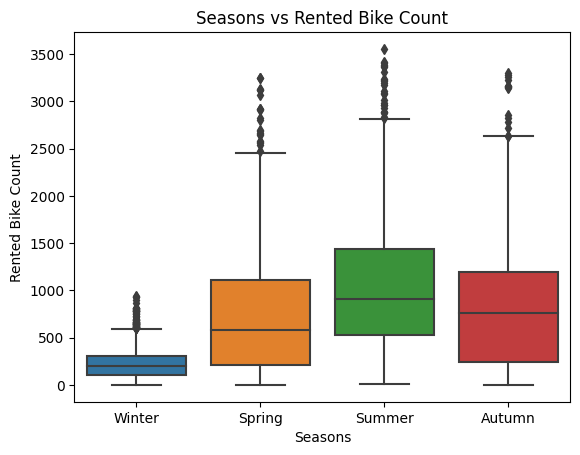

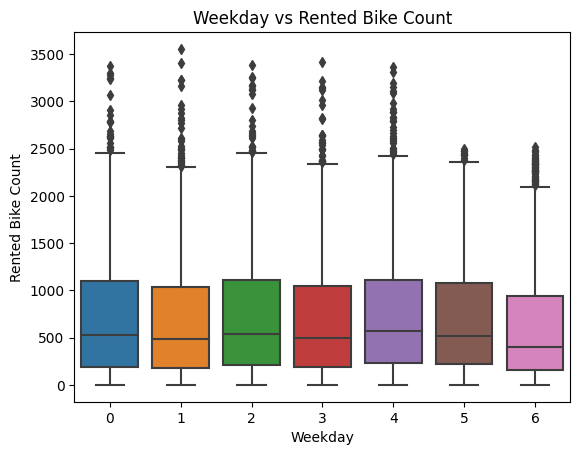

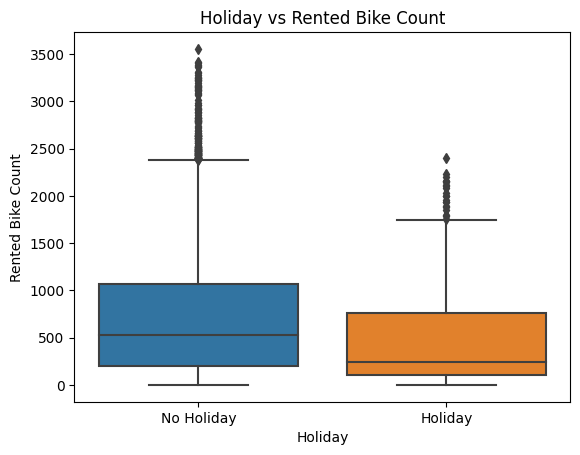

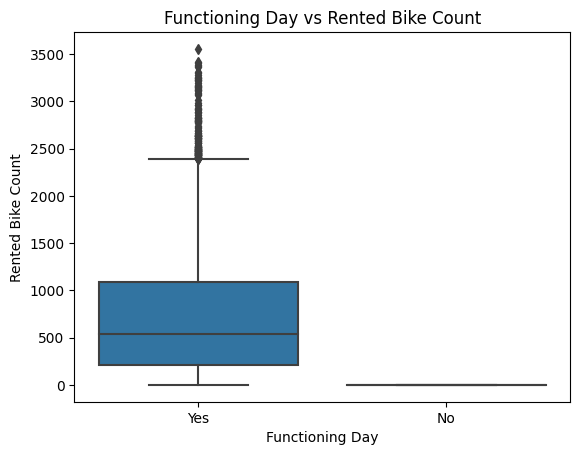

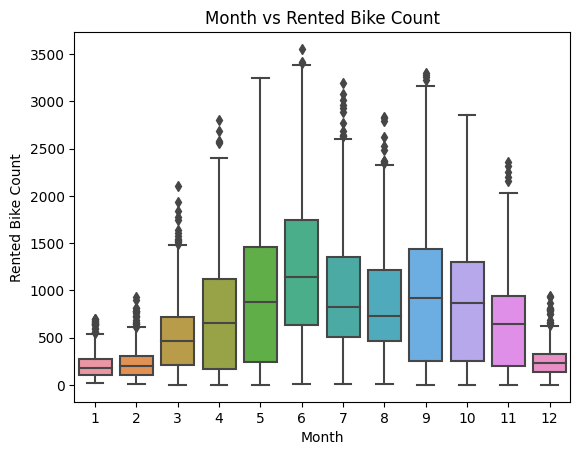

In [ ]:
# Boxplot is drawn wrt Rented bike count for all the categorical features.

for feat in categorical_features:

    # Boxplot
    sns.boxplot(x = df[feat], y = df['Rented Bike Count'])
    plt.title(f'{feat} vs Rented Bike Count')

    # Show the plot
    plt.show()

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **3. Scatter plot wrt dependent var to check colinear relation.**

In [30]:
# Chart - 6 visualization code
for feat in categorical_features:

    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented Bike Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

NameError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

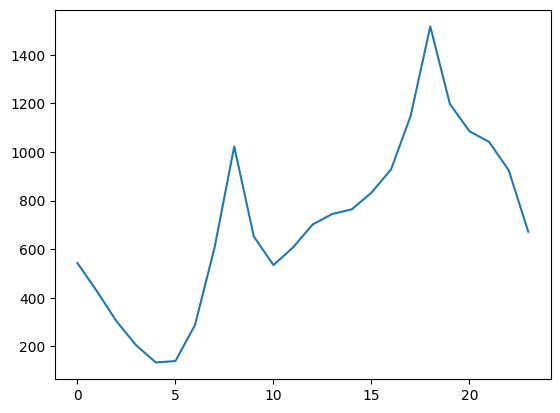

In [32]:
# Chart - 7 visualization code
y = df.groupby('Hour')['Rented_Bike_Count'].mean()
x = df['Hour'].unique()
plt.plot(x, y)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Correlation Heatmap**

<ipython-input-33-6c841a889961>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

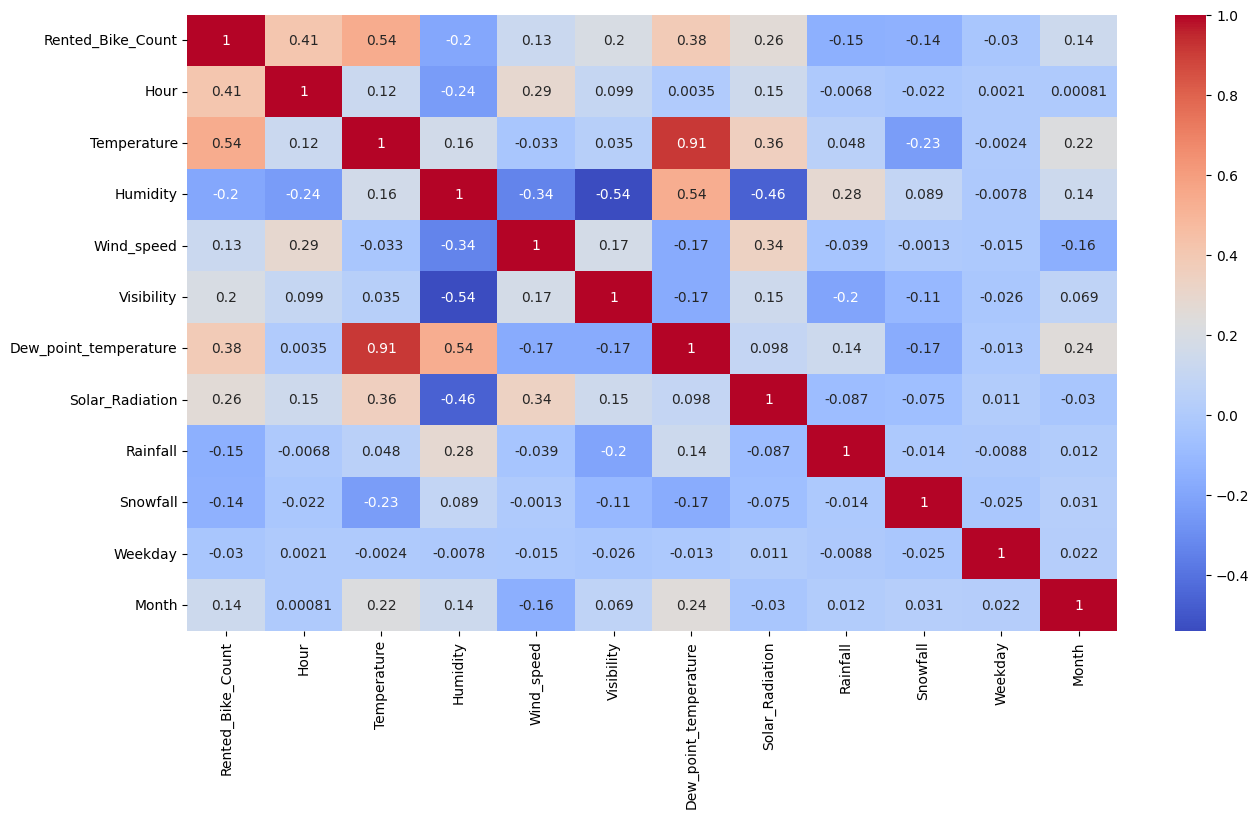

In [33]:
# Correlation Heatmap visualization code
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- This plot is pick to find the correlation of different features with Rented bike count and features with each other.

##### 2. What is/are the insight(s) found from the chart?

- Rented bike count has more correlation with Hour and Temperature.
- Weekday has no correlation with bike count so we can drop it.
- Temperature is highly correlated with Dew point temperature.

#### **Pair Plot**

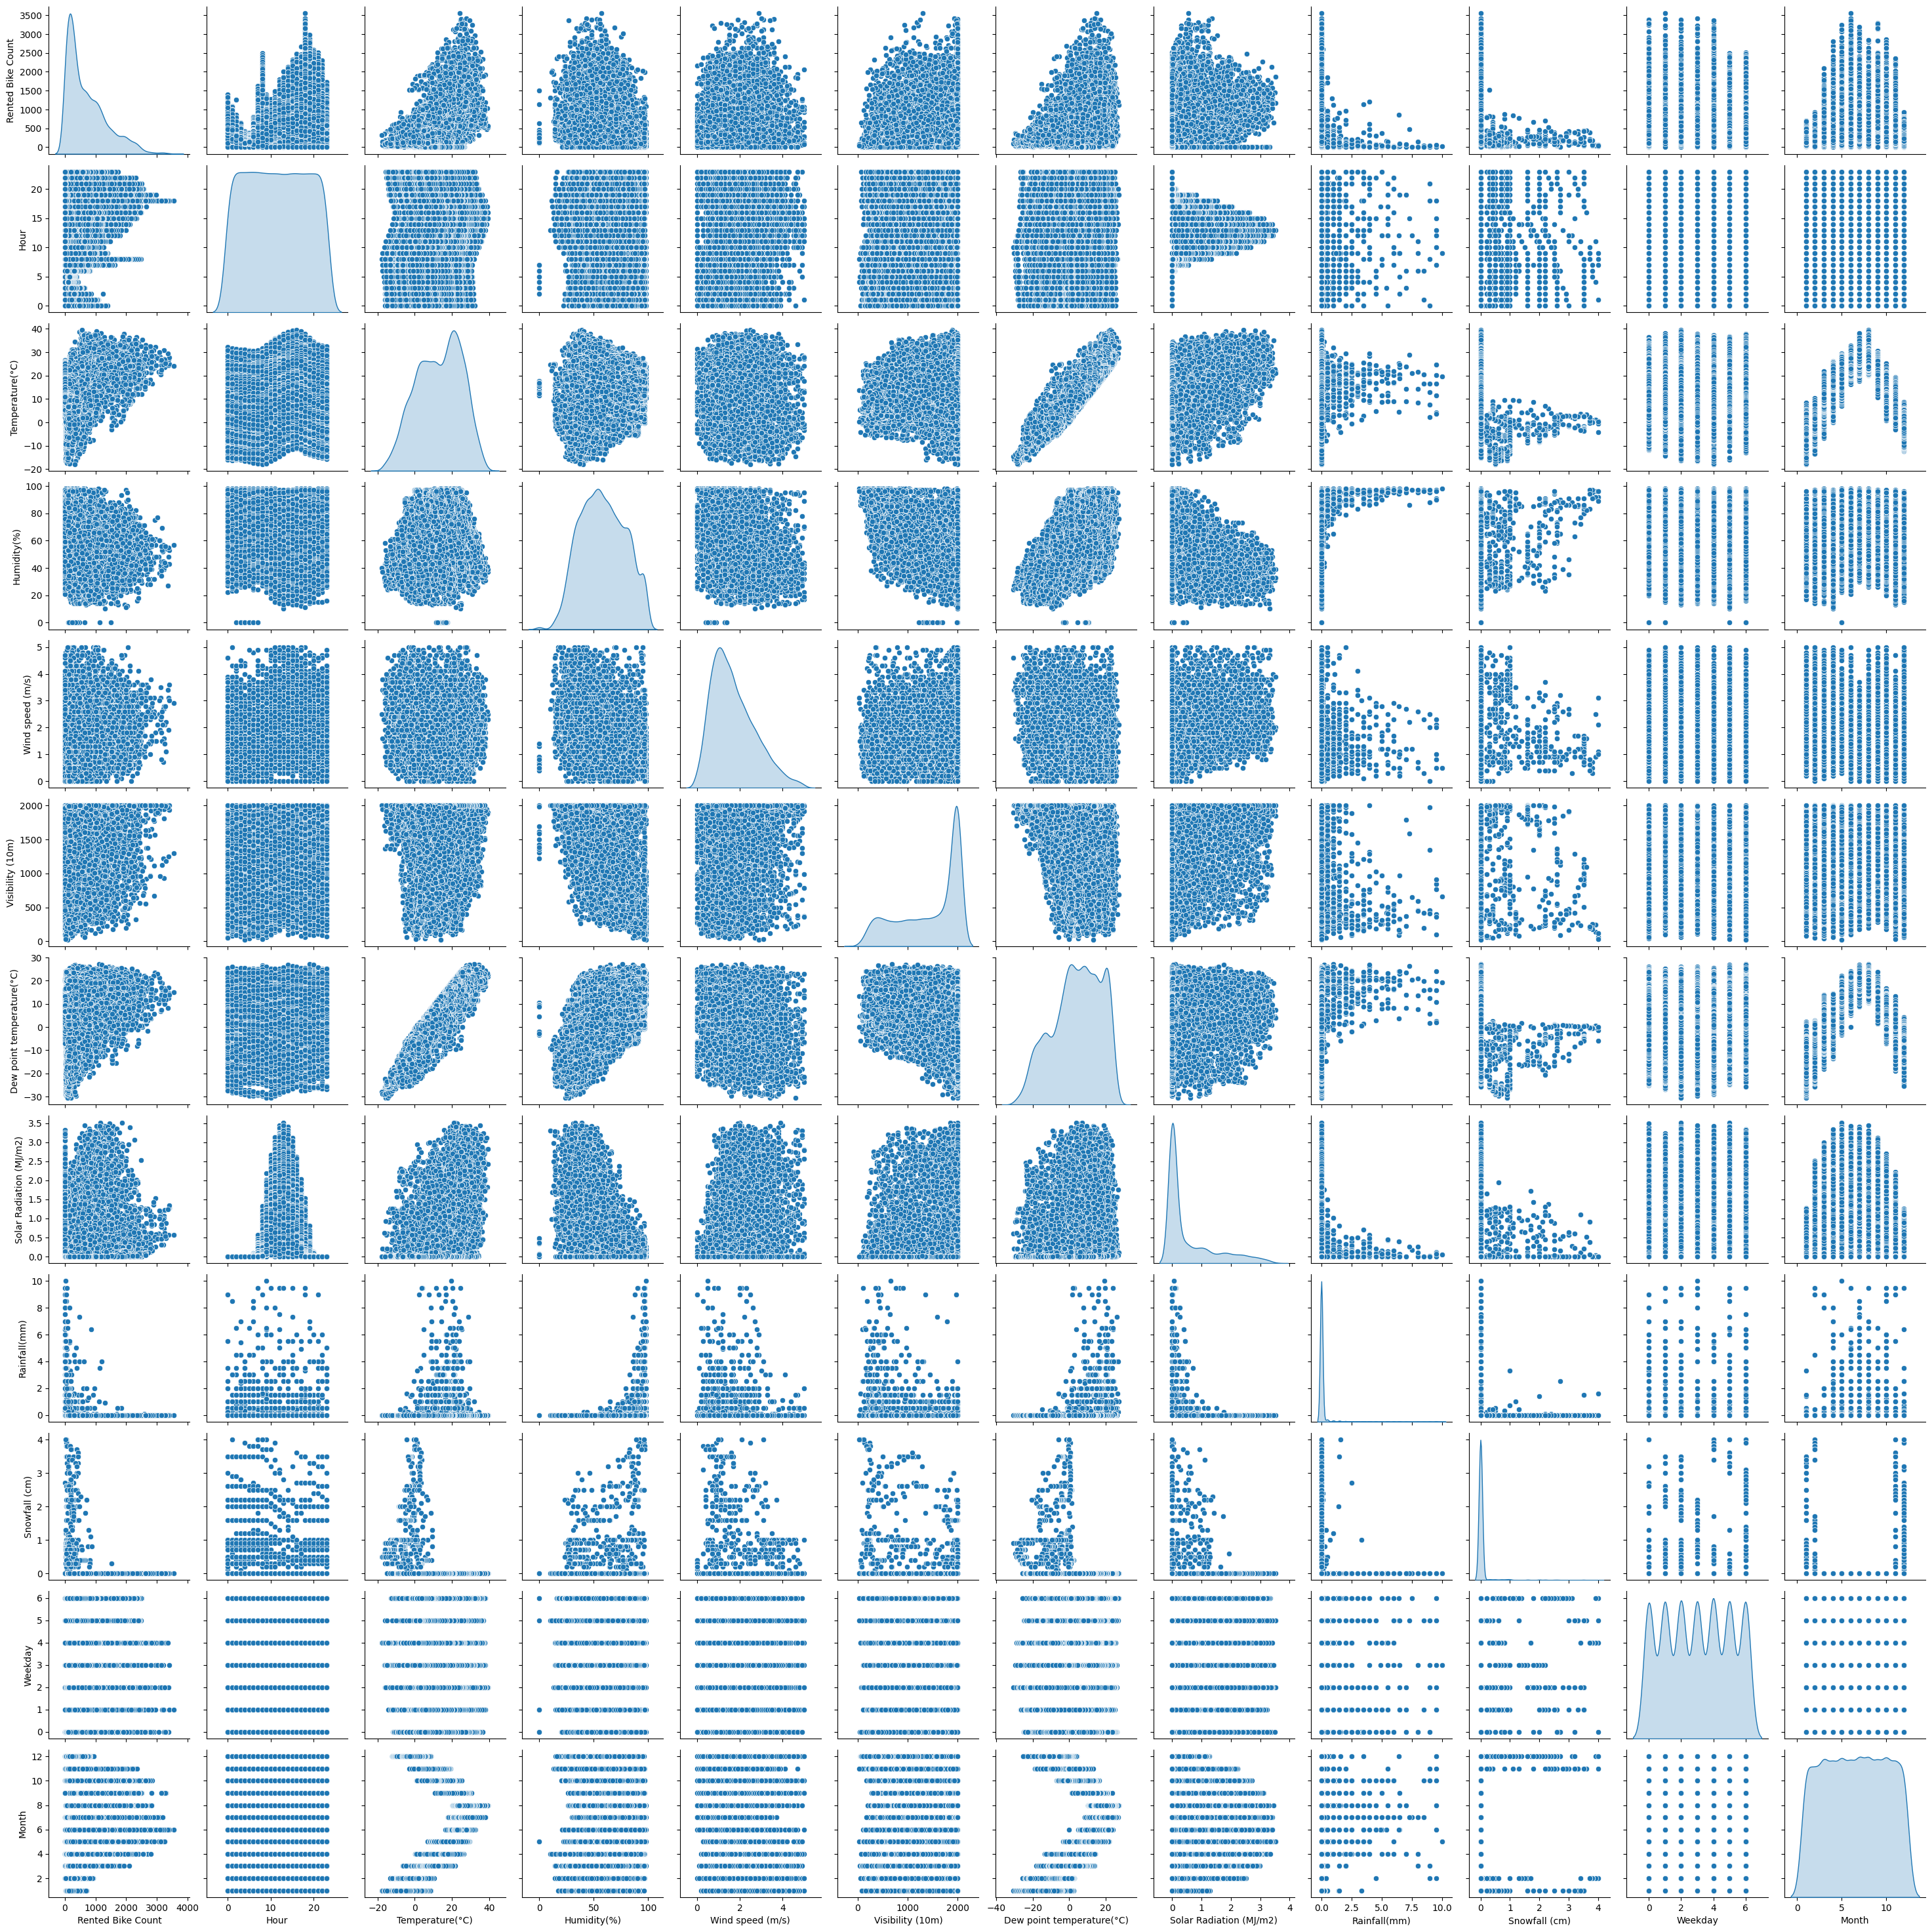

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

#### 1. Handling Missing Values

- No missing values




In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Weekday                      0
Month                        0
dtype: int64

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

There are few columns which are of categorical type and needs to do encoding.

In [ ]:
# Encode your categorical columns
df.head().T

0           1           2           3  \
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   
Weekday                             4           4           4           4   
Month                              12          12          12          12   

                                    4  
Rented Bike Count                  78  
Hour                                4  
Temperature(°C)                  -6.0  
Humidity(%)                        36  
Wind speed (m/s)                  2.3  
Visibility (10m)                 2000  
Dew point temperature(°C)       -18.6  
Solar Radiation (MJ/m2)           0.0  
Rainfall(mm)                      0.0  
Snowfall (cm)                     0.0  
Seasons                        Winter  
Holiday                    No Holiday  
Functioning Day                   Yes  
Weekday                             4  
Month                              12

1. Handle Functioning day
2. Handle Holiday
3. Handlie Seasons

In [ ]:
# 1. Seasons
# df['Seasons'].unique()
# season_dict = {'Winter': 1, 'Spring':2, 'Summer' : 3, 'Autumn':4}

# df['Seasons'] = df['Seasons'].map(season_dict)
# df.head().T

In [ ]:
one_hot_encoded = pd.get_dummies(df['Seasons'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
#
conv_binary = {'Yes': 1, 'No': 0}
df['Functioning Day'] = df['Functioning Day'].map(conv_binary)
df.head().T

0           1           2           3  \
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                     1           1           1           1   
Weekday                             4           4           4           4   
Month                              12          12          12          12   
Autumn                              0           0           0           0   
Spring                              0           0           0           0   
Summer                              0           0           0           0   
Winter                              1           1           1           1   

                                    4  
Rented Bike Count                  78  
Hour                                4  
Temperature(°C)                  -6.0  
Humidity(%)                        36  
Wind speed (m/s)                  2.3  
Visibility (10m)                 2000  
Dew point temperature(°C)       -18.6  
Solar Radiation (MJ/m2)           0.0  
Rainfall(mm)                      0.0  
Snowfall (cm)                     0.0  
Seasons                        Winter  
Holiday                    No Holiday  
Functioning Day                     1  
Weekday                             4  
Month                              12  
Autumn                              0  
Spring                              0  
Summer                              0  
Winter                              1

In [ ]:
# 3 encoding holiday column
df['Holiday'].unique()
conv_binary = {'Holiday': 1, 'No Holiday': 0}
df['Holiday'] = df['Holiday'].map(conv_binary)
# df.head().T

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation
Remove the week column

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.drop('Weekday', axis = 1, inplace = True)
df.drop('Seasons', axis = 1, inplace = True)
df.head().T

0       1       2       3       4
Rented Bike Count           254.0   204.0   173.0   107.0    78.0
Hour                          0.0     1.0     2.0     3.0     4.0
Temperature(°C)              -5.2    -5.5    -6.0    -6.2    -6.0
Humidity(%)                  37.0    38.0    39.0    40.0    36.0
Wind speed (m/s)              2.2     0.8     1.0     0.9     2.3
Visibility (10m)           2000.0  2000.0  2000.0  2000.0  2000.0
Dew point temperature(°C)   -17.6   -17.6   -17.7   -17.6   -18.6
Solar Radiation (MJ/m2)       0.0     0.0     0.0     0.0     0.0
Rainfall(mm)                  0.0     0.0     0.0     0.0     0.0
Snowfall (cm)                 0.0     0.0     0.0     0.0     0.0
Holiday                       0.0     0.0     0.0     0.0     0.0
Functioning Day               1.0     1.0     1.0     1.0     1.0
Month                        12.0    12.0    12.0    12.0    12.0
Autumn                        0.0     0.0     0.0     0.0     0.0
Spring                        0.0     0.0     0.0     0.0     0.0
Summer                        0.0     0.0     0.0     0.0     0.0
Winter                        1.0     1.0     1.0     1.0     1.0

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

**Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

In [36]:
def draw_plot(y):

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Subplot 1: Histogram
    sns.histplot(y, kde = True, ax=axs[0])
    axs[0].axvline(y.mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(y.median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(y, ax=axs[1])
    axs[1].set_title('boxplot')

    #Subplot 3: Q-Q plot
    stats.probplot(y, plot = axs[2], dist="norm")
    axs[2].set_title('Q-Q Plot')

    # Show the plot
    plt.show()

In [34]:
def test_transformation(feat):
    # plot 1 Withoutransformation
    y = df[feat]
    draw_plot(y)

    # plot 2 with log transformation
    print('log transformation')
    y = np.log10(df[feat])
    draw_plot(y)

    # plot 3 with squareroot transformation
    print('Square root transformation')
    y = np.sqrt(df[feat])
    draw_plot(y)

    # plot 4 with inversent transformation
    print('Inverse transformation')
    y = 1/(df[feat])
    draw_plot(y)

#### **5.1 Dependent variable - Rented bike count**

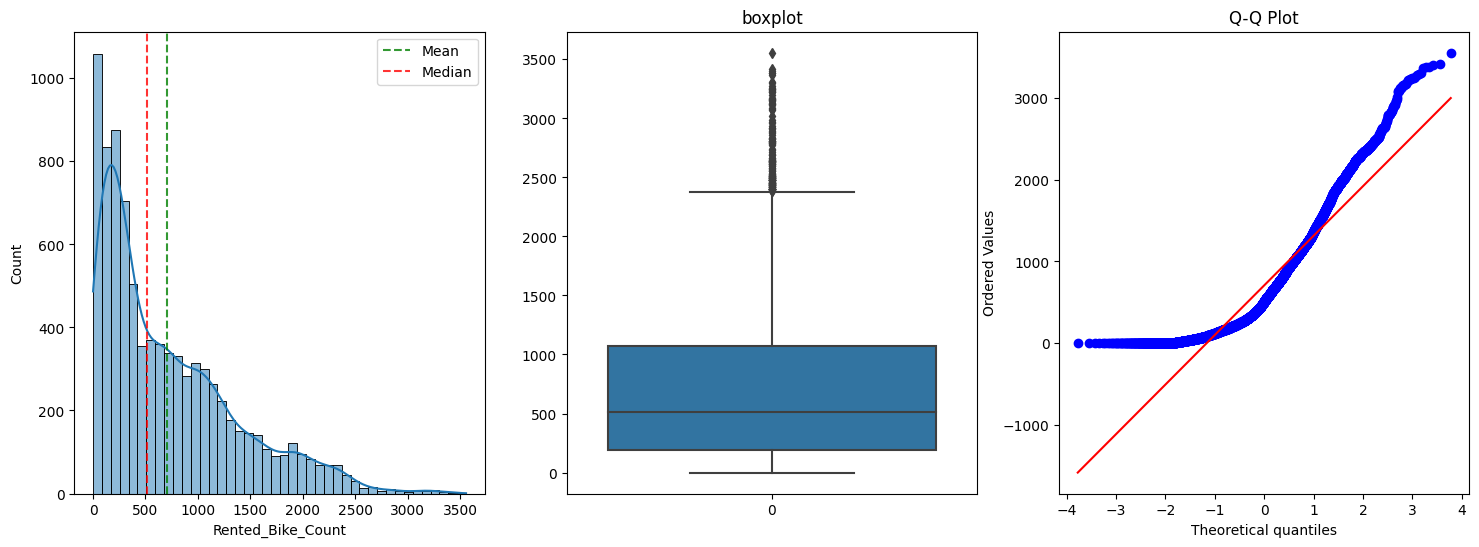

In [ ]:
feat = 'Rented_Bike_Count'
y = df[feat]
draw_plot(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


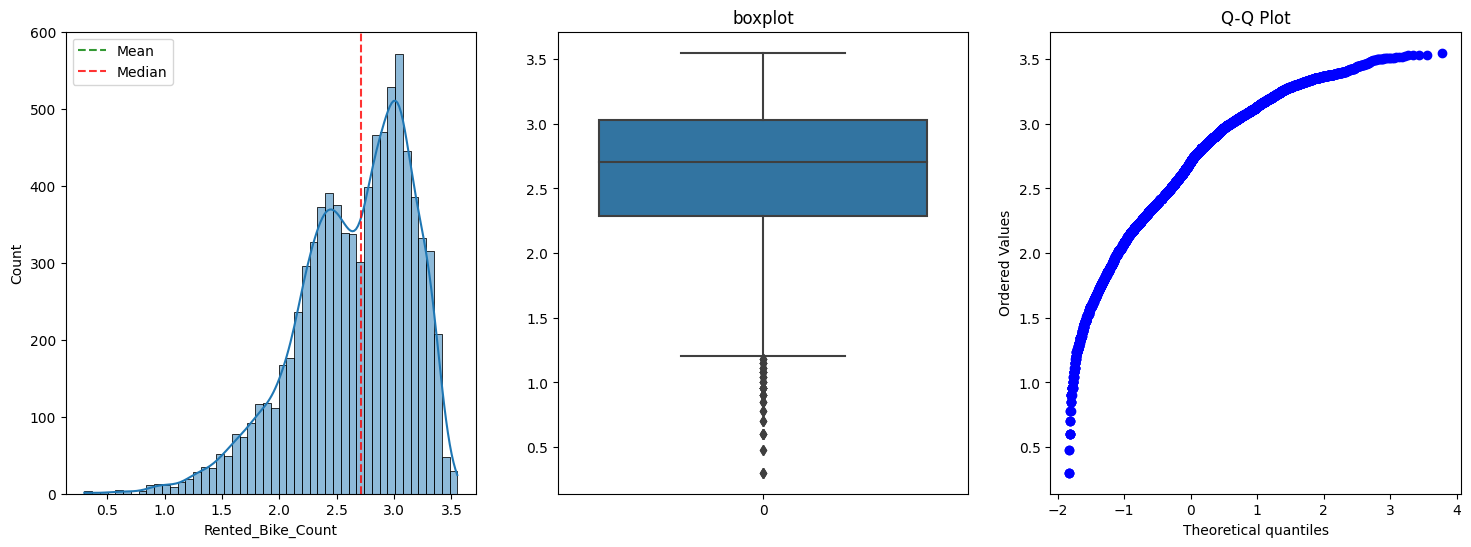

In [ ]:
y = np.log10(df[feat])
draw_plot(y)

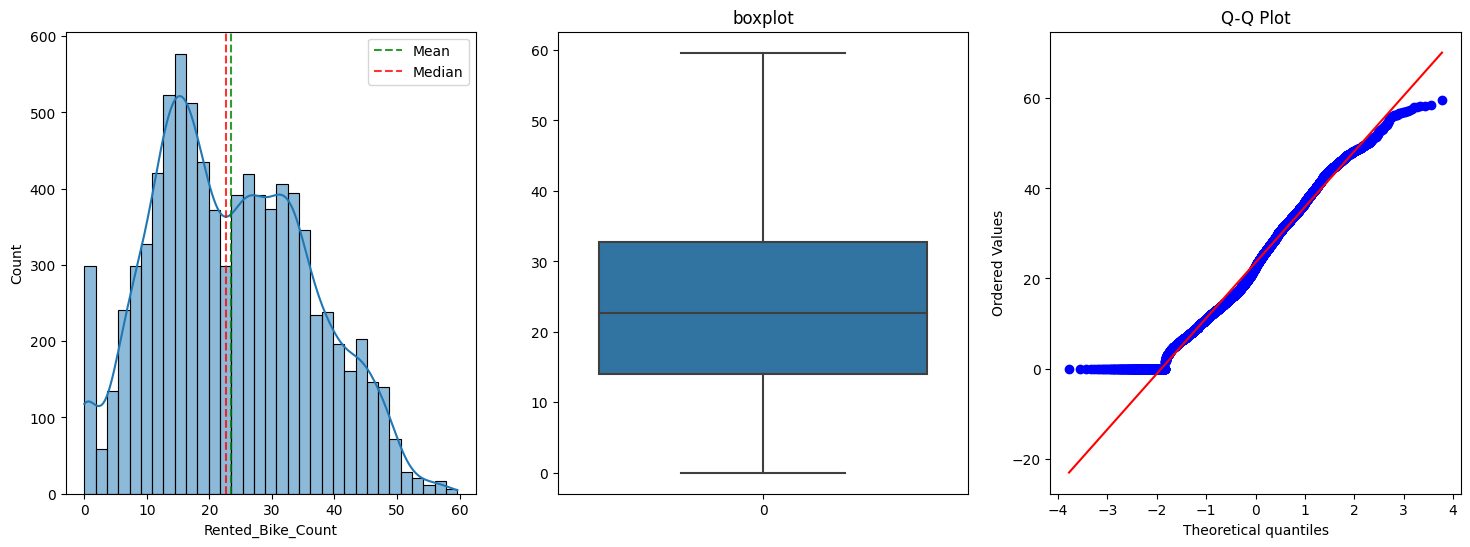

In [ ]:
y = np.sqrt(df[feat])
draw_plot(y)

5.2

#### **5.2 independent variable - Temperature**

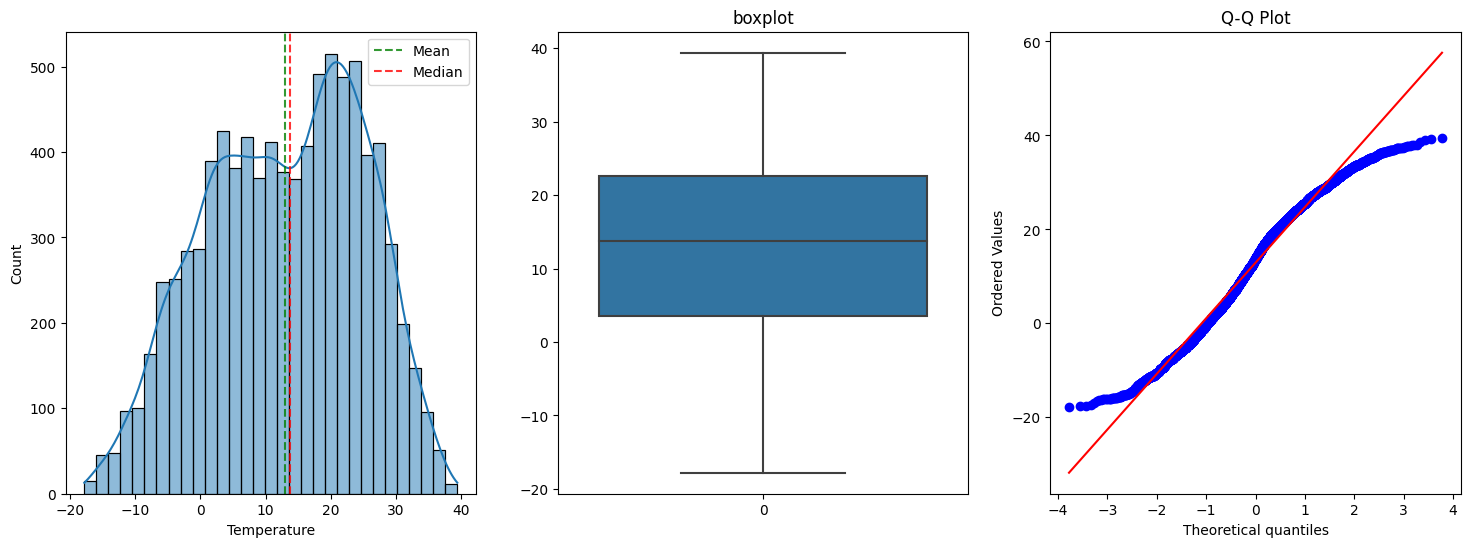

In [ ]:
feat = 'Temperature'
y = df[feat]
draw_plot(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


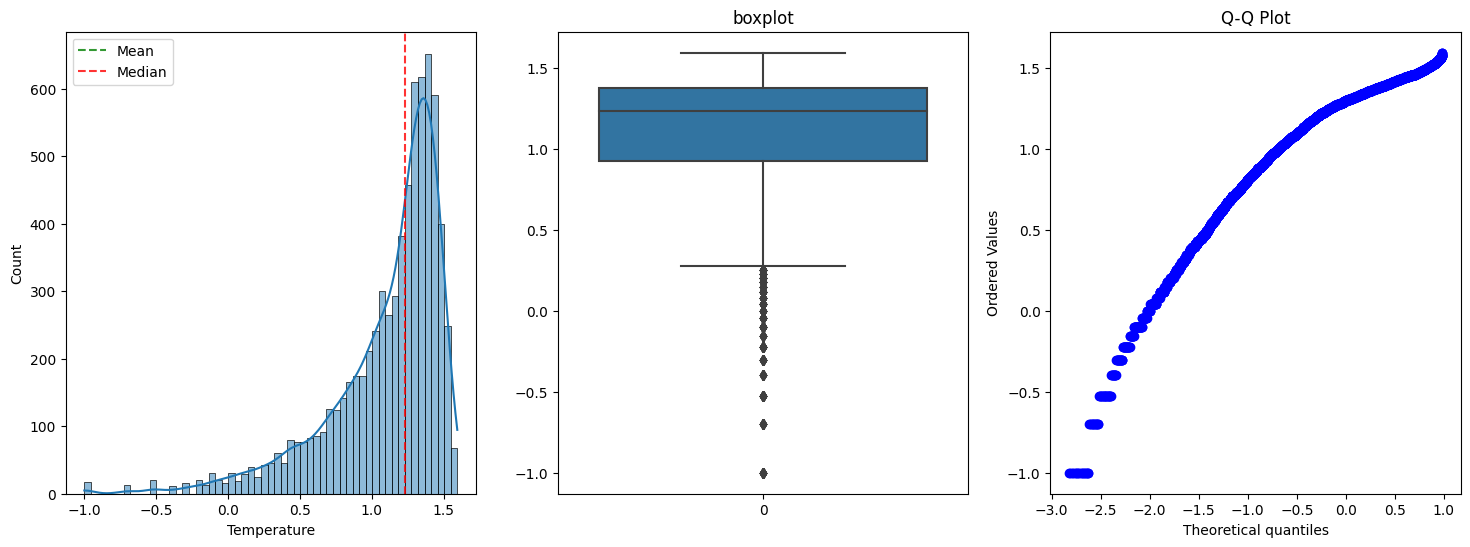

In [ ]:
y = np.log10(df[feat])
draw_plot(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


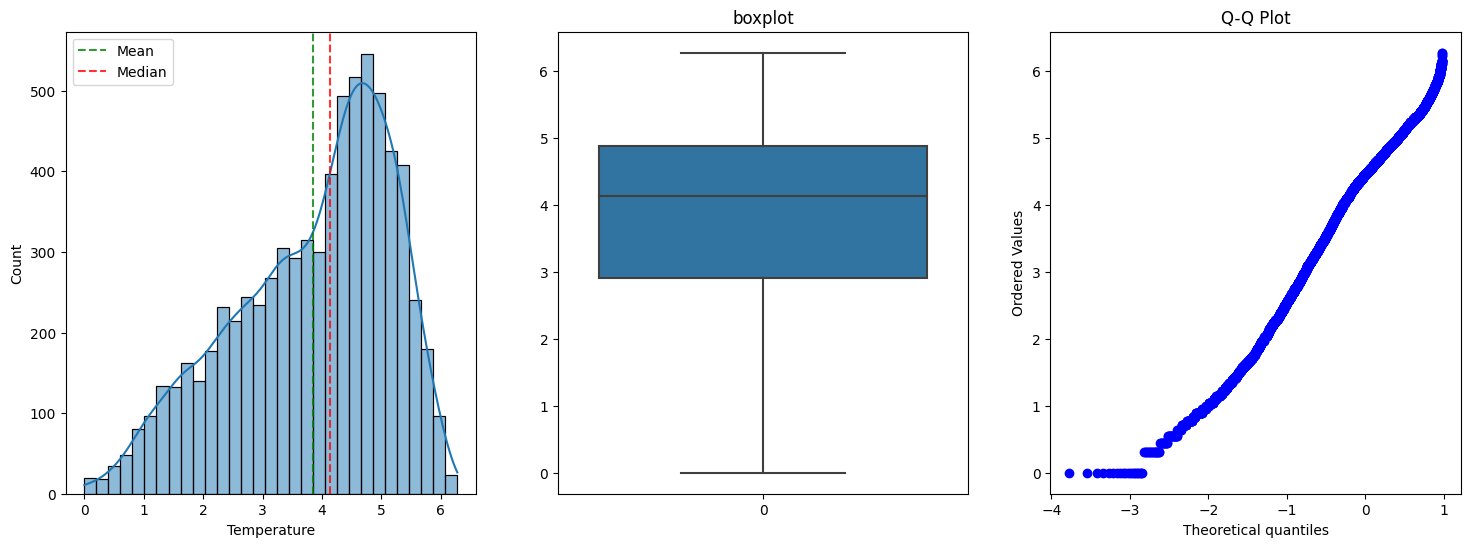

In [ ]:

y = np.sqrt(df[feat])
draw_plot(y)

5.2

#### **5.3 independent variable - Humidity**

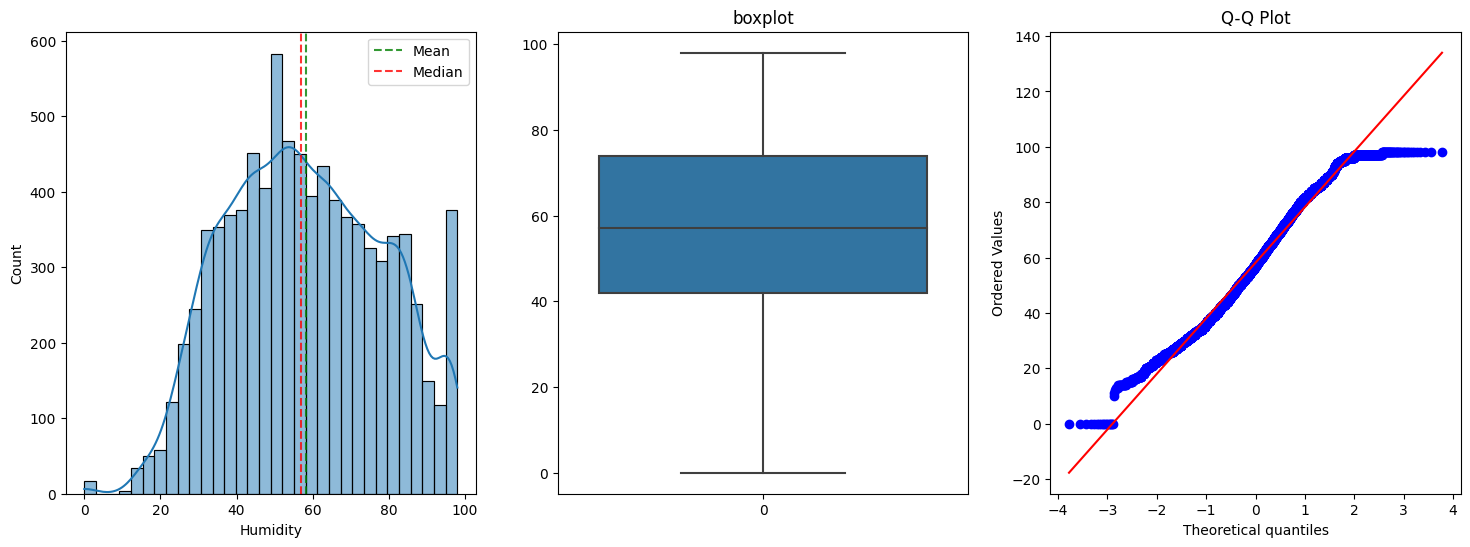

In [ ]:
feat = 'Humidity'
y = df[feat]
draw_plot(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


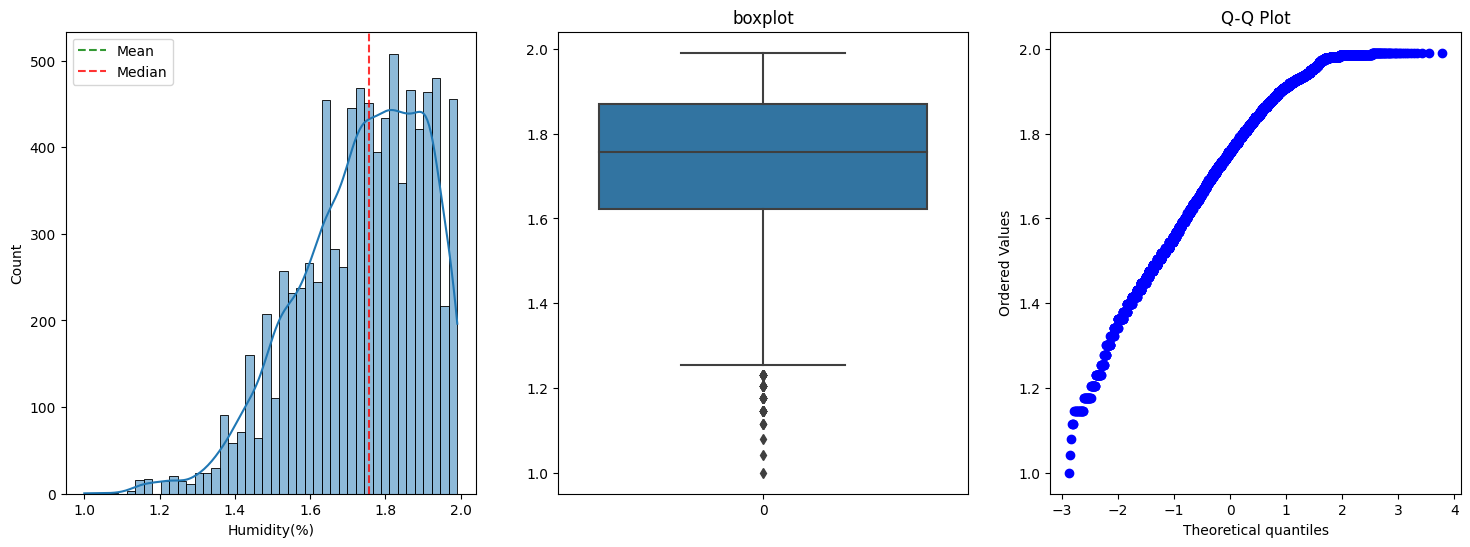

In [ ]:
y = np.log10(df[feat])
draw_plot(y)

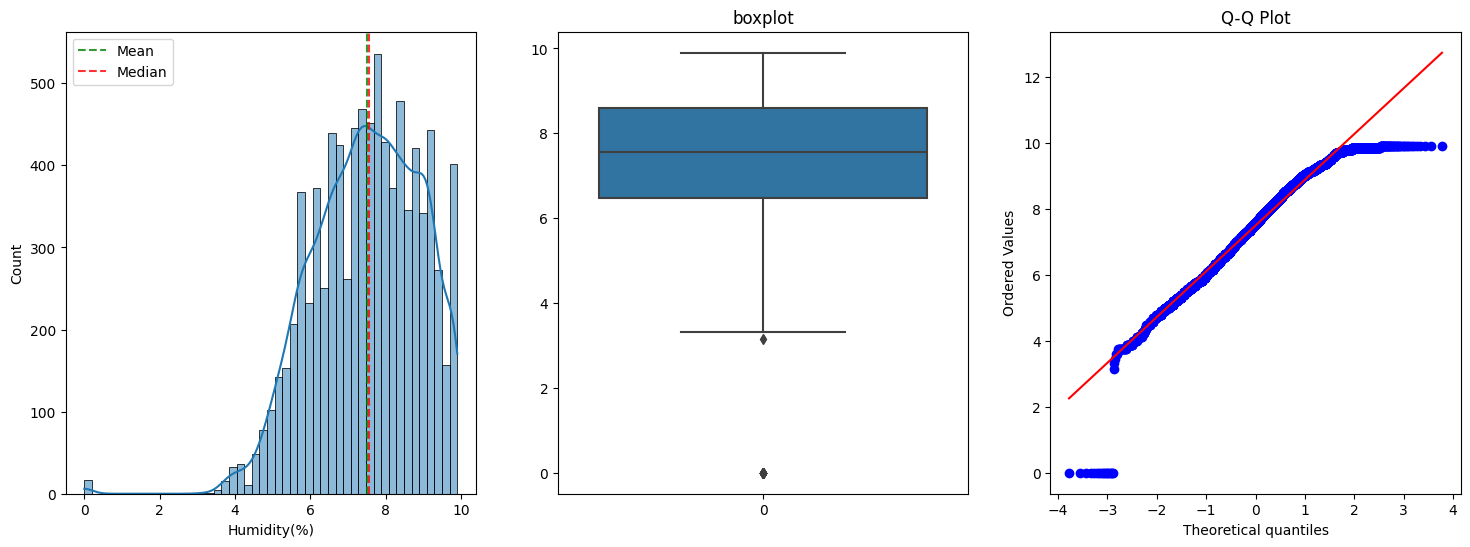

In [ ]:
feat = 'Humidity(%)'
y = np.sqrt(df[feat])
draw_plot(y)

5.2

#### **5.3 independent variable -'Wind speed (m/s)'**

In [ ]:
feat = 'Wind speed (m/s)'

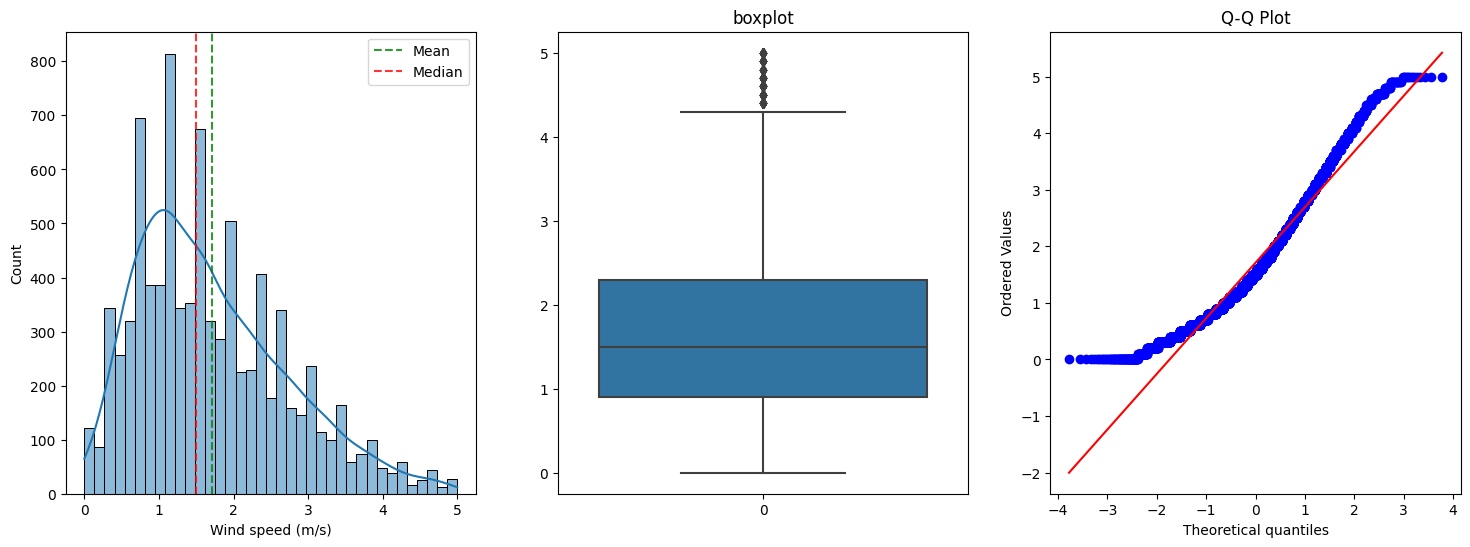

In [ ]:
y = df[feat]
draw_plot(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


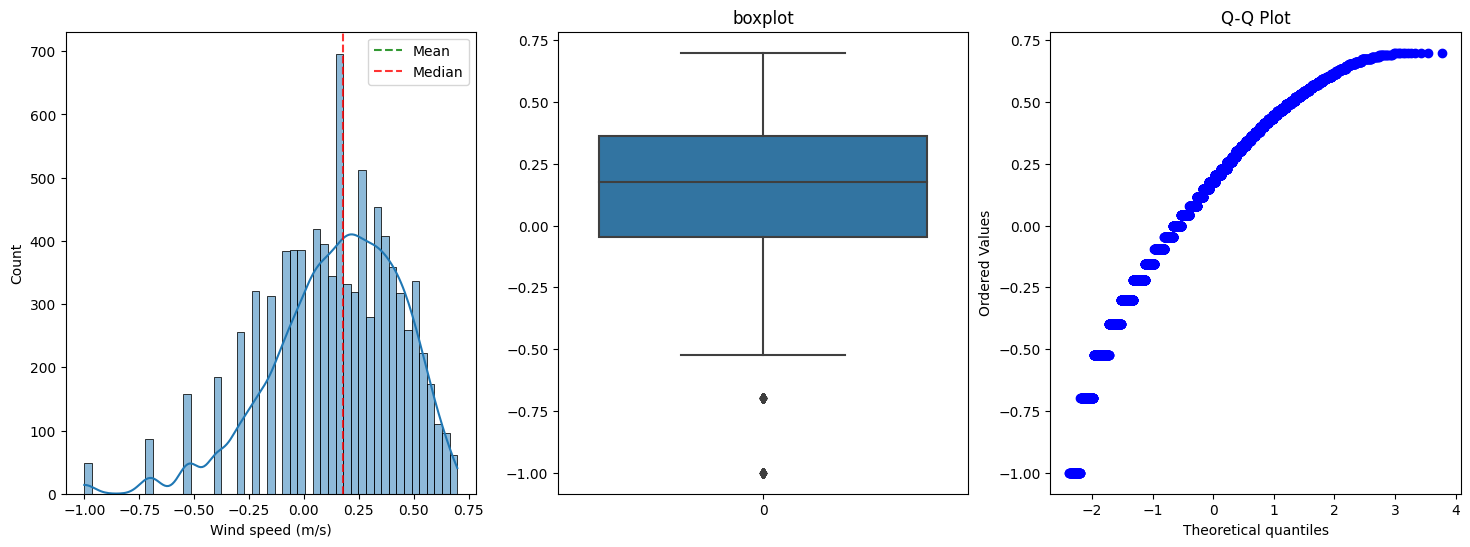

In [ ]:

y = np.log10(df[feat])
draw_plot(y)

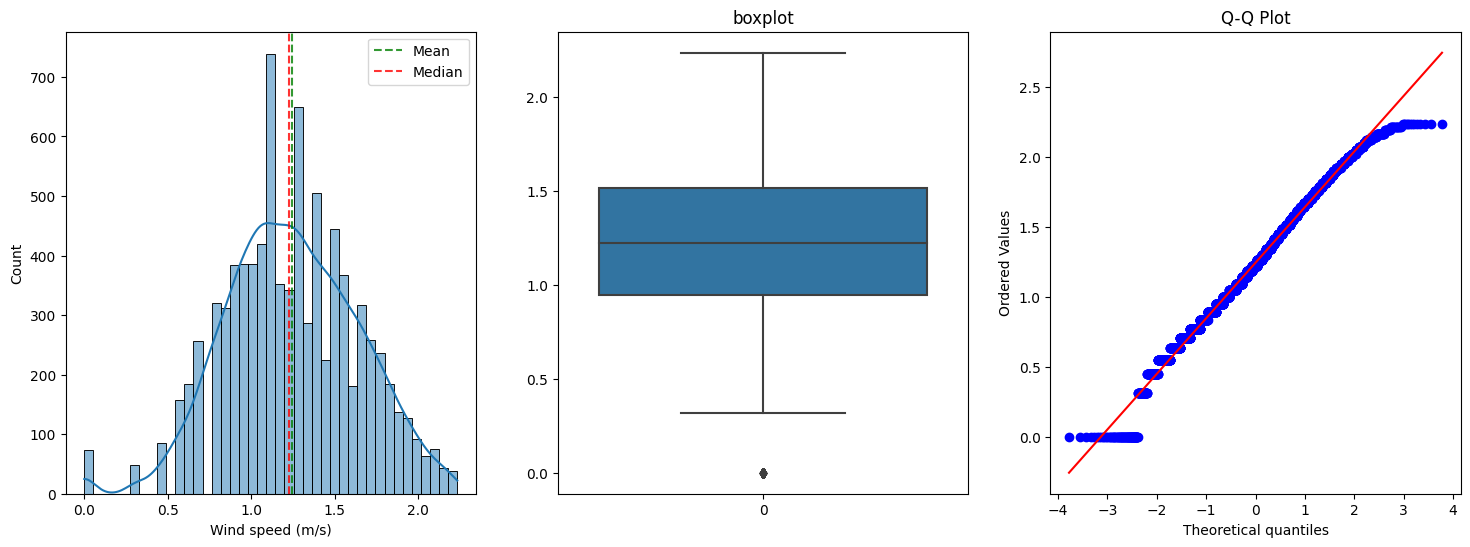

In [ ]:
feat = 'Humidity(%)'
y = np.sqrt(df[feat])
draw_plot(y)

5.2

#### chart 5

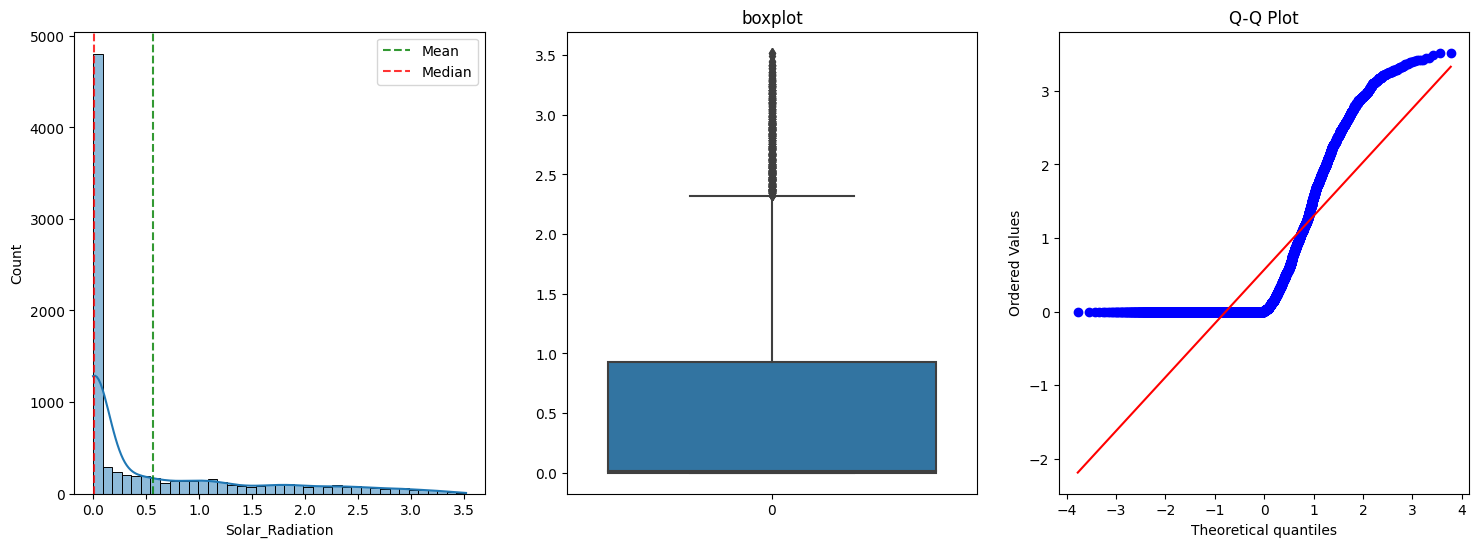

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


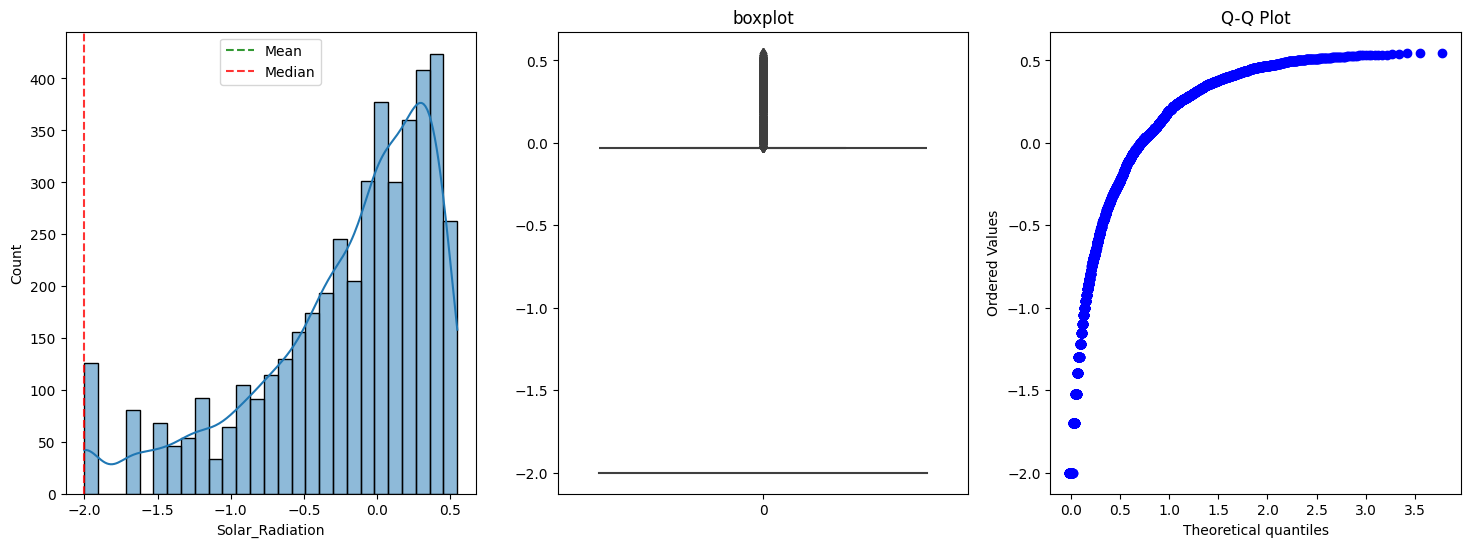

Square root transformation


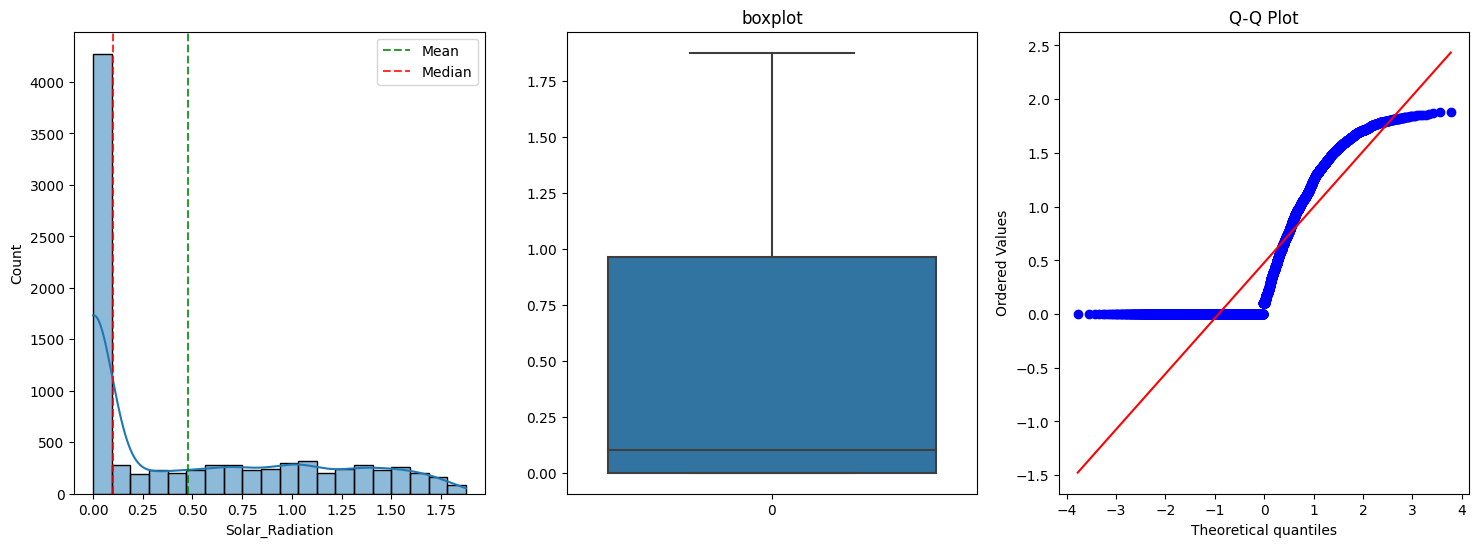

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


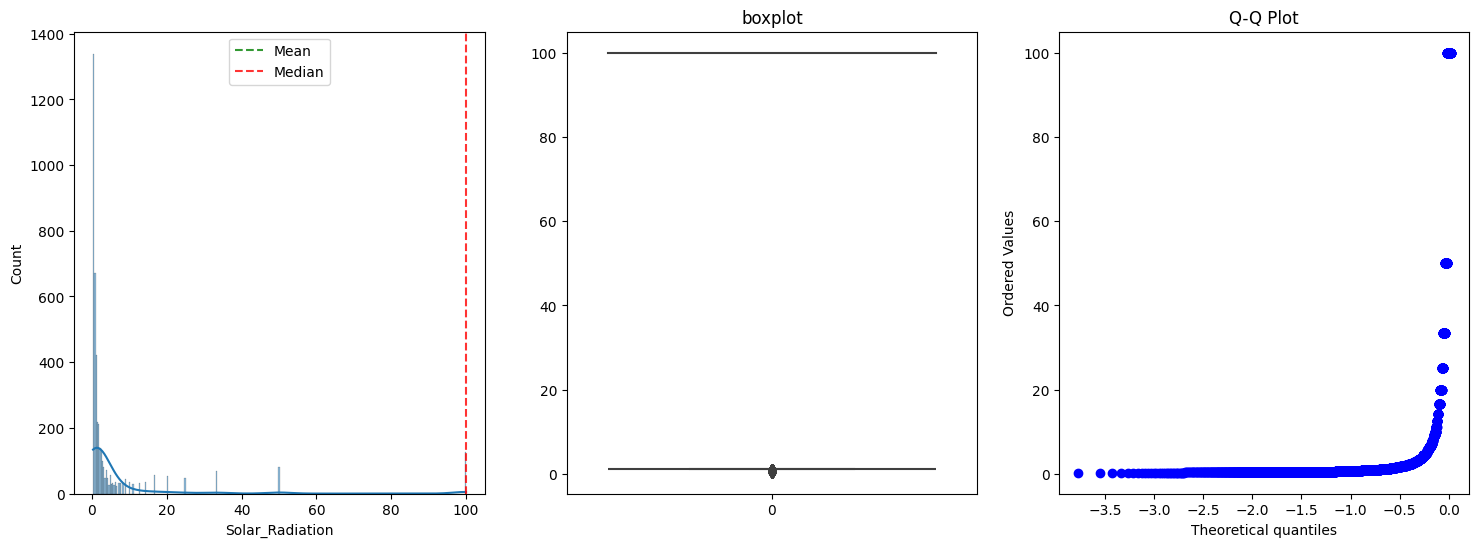

In [37]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Solar_Radiation'
test_transformation(feat)

#### chart 5

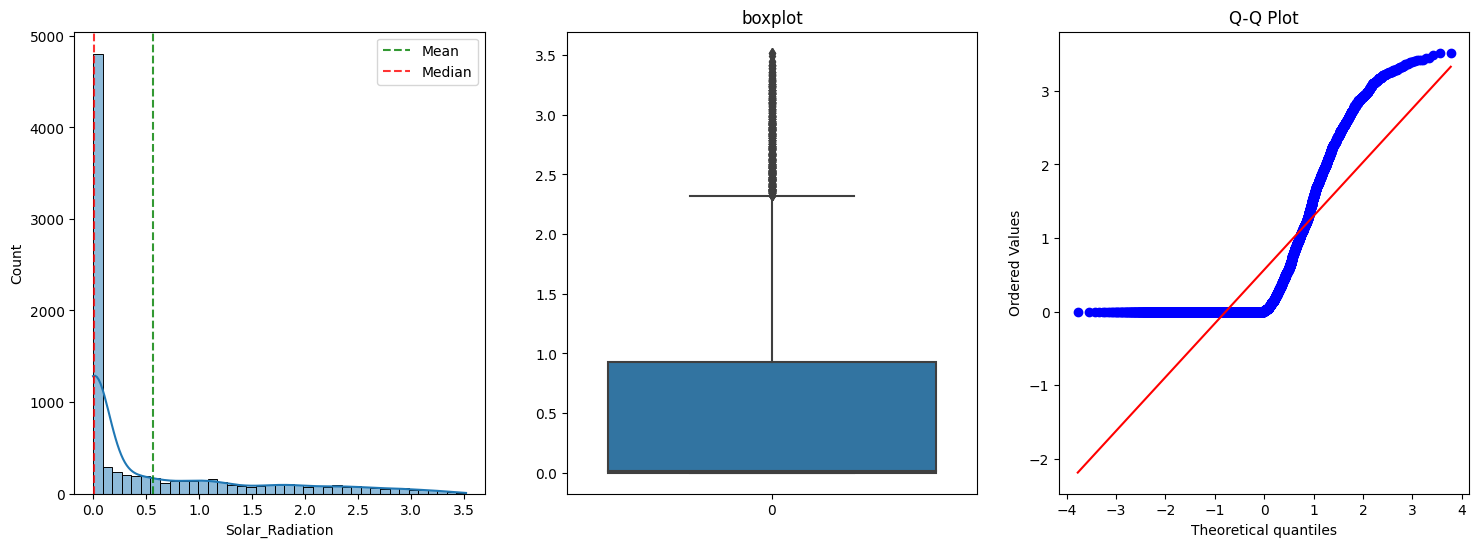

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


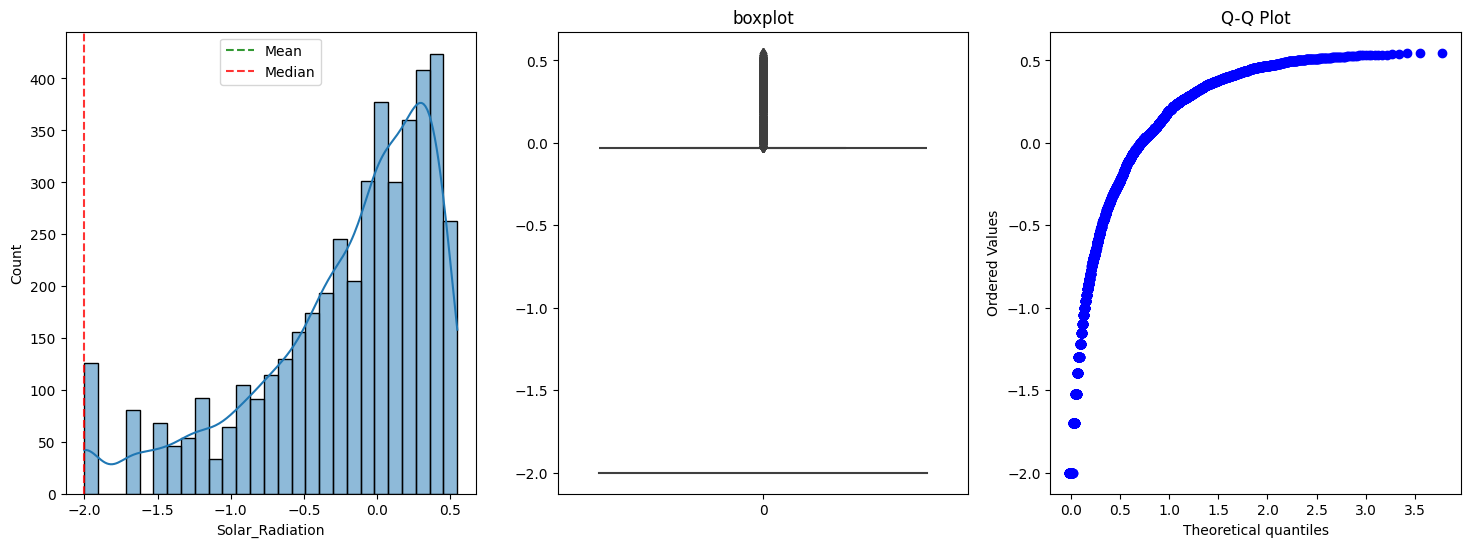

Square root transformation


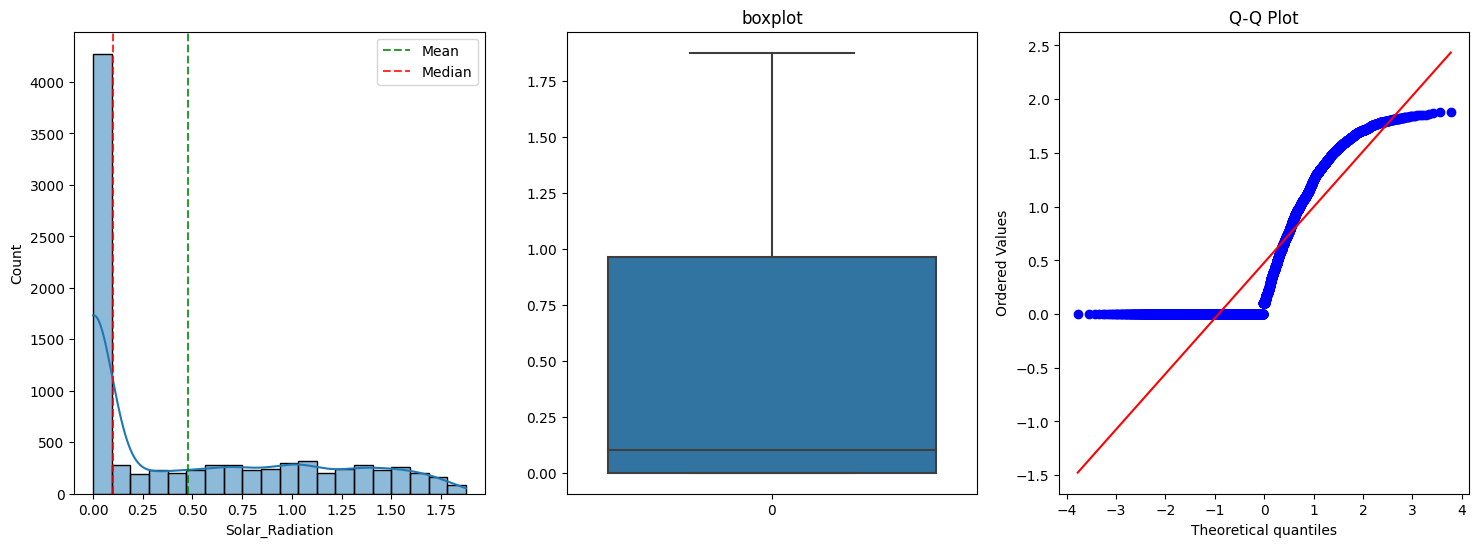

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


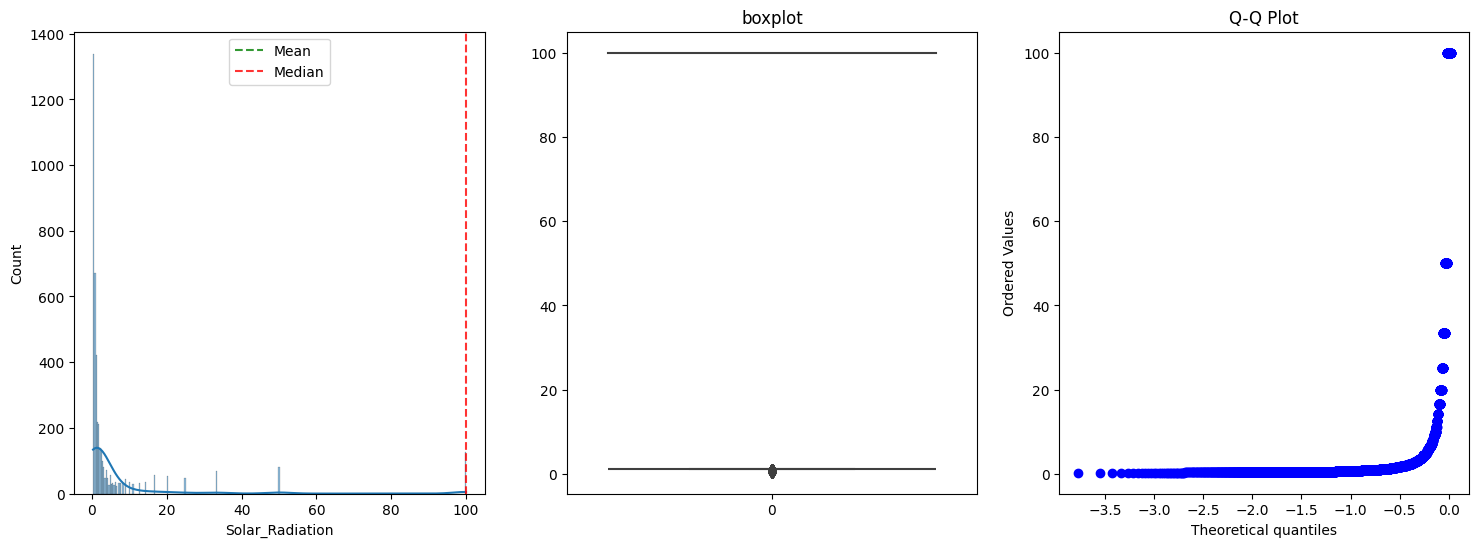

In [ ]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Solar_Radiation'
test_transformation(feat)

#### chart 5

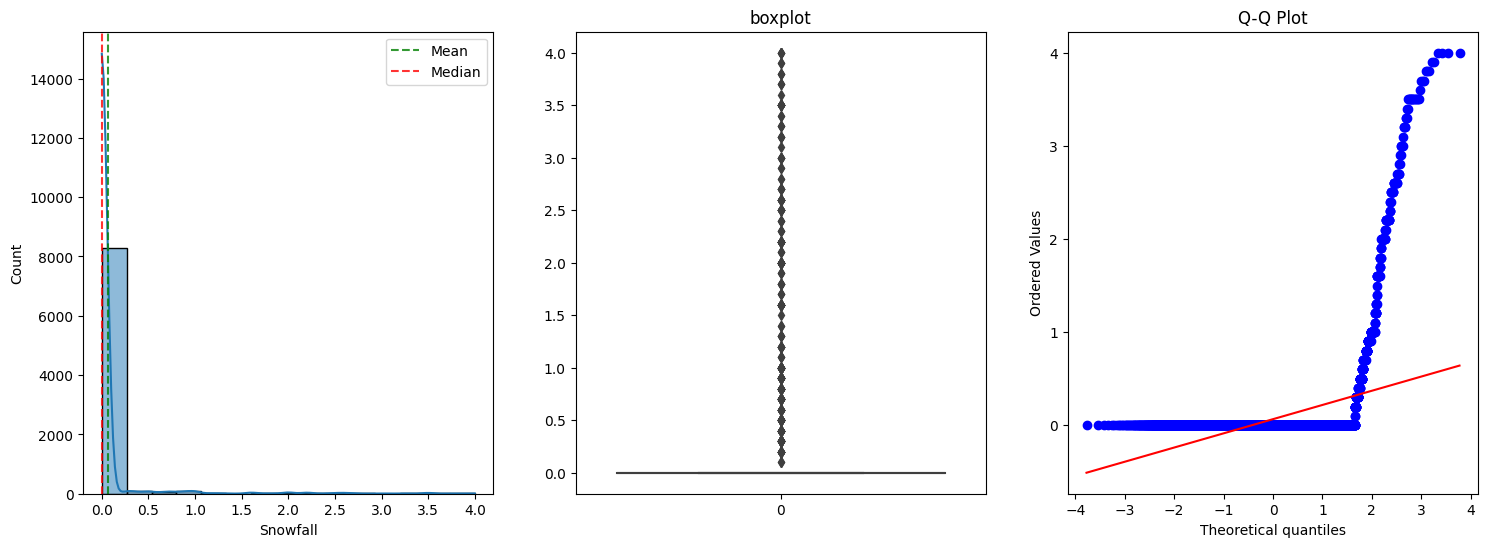

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


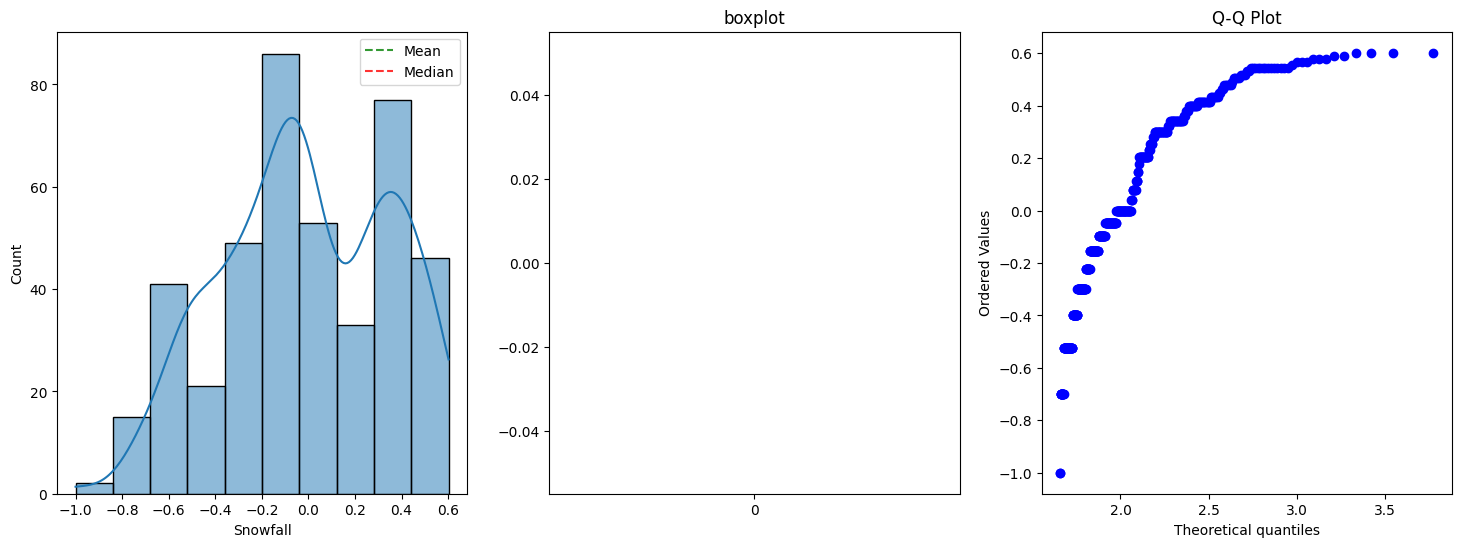

Square root transformation


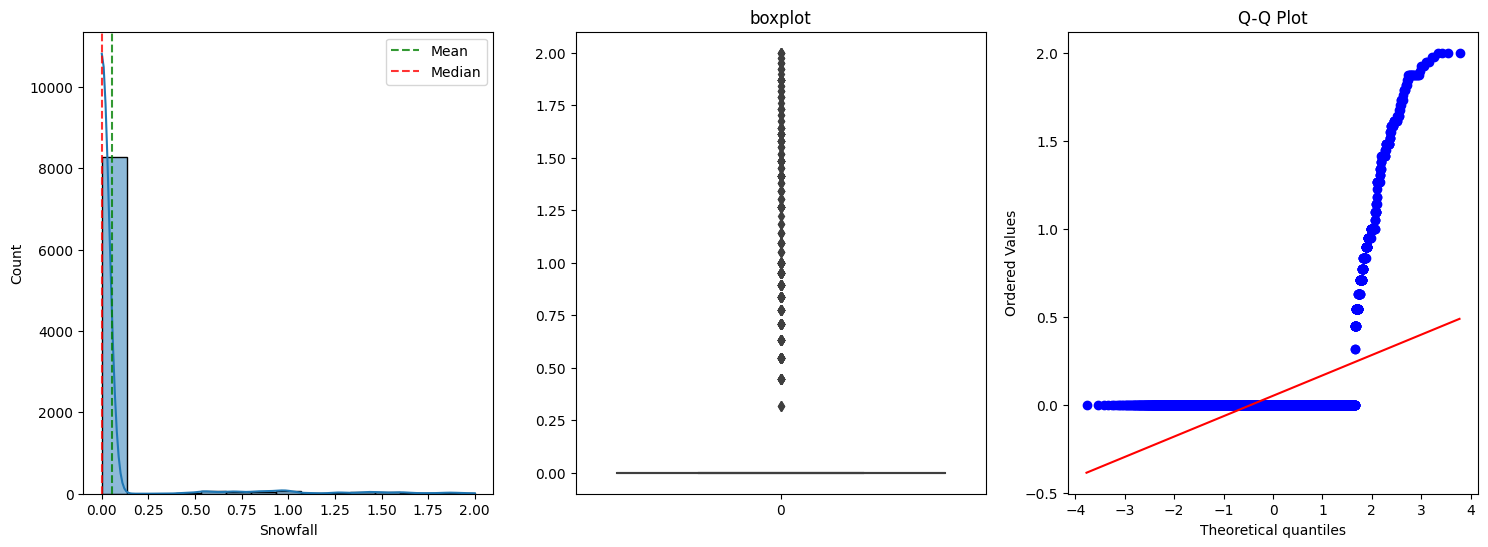

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


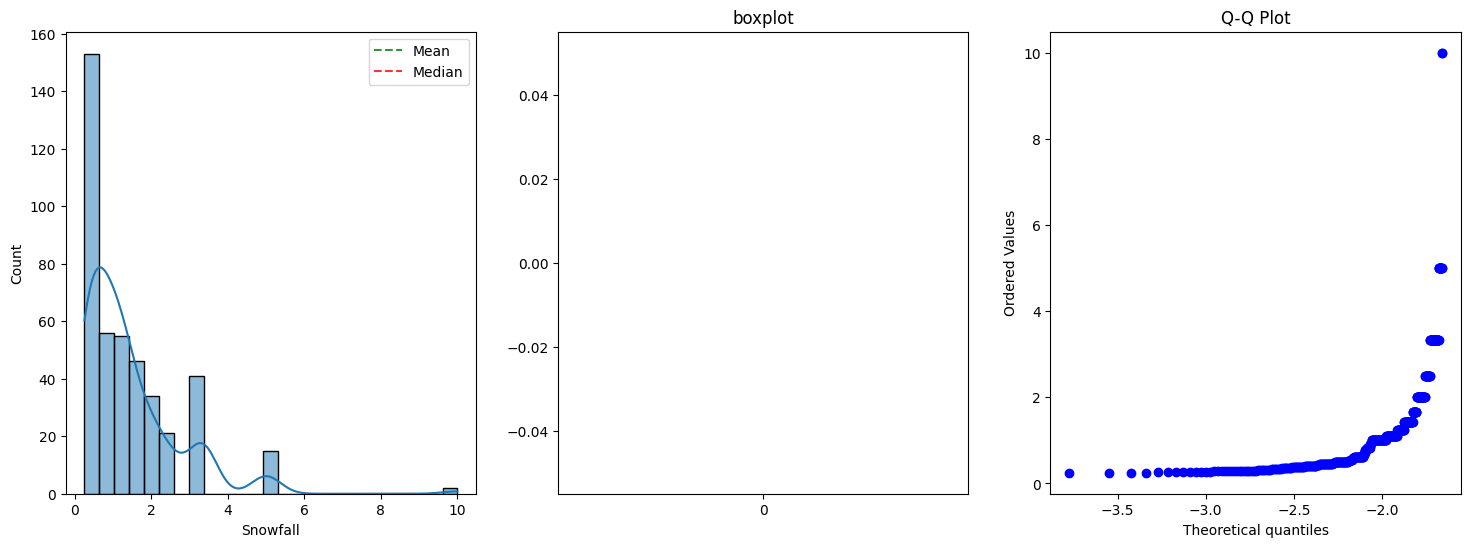

In [39]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Snowfall'
test_transformation(feat)

#### chart 5

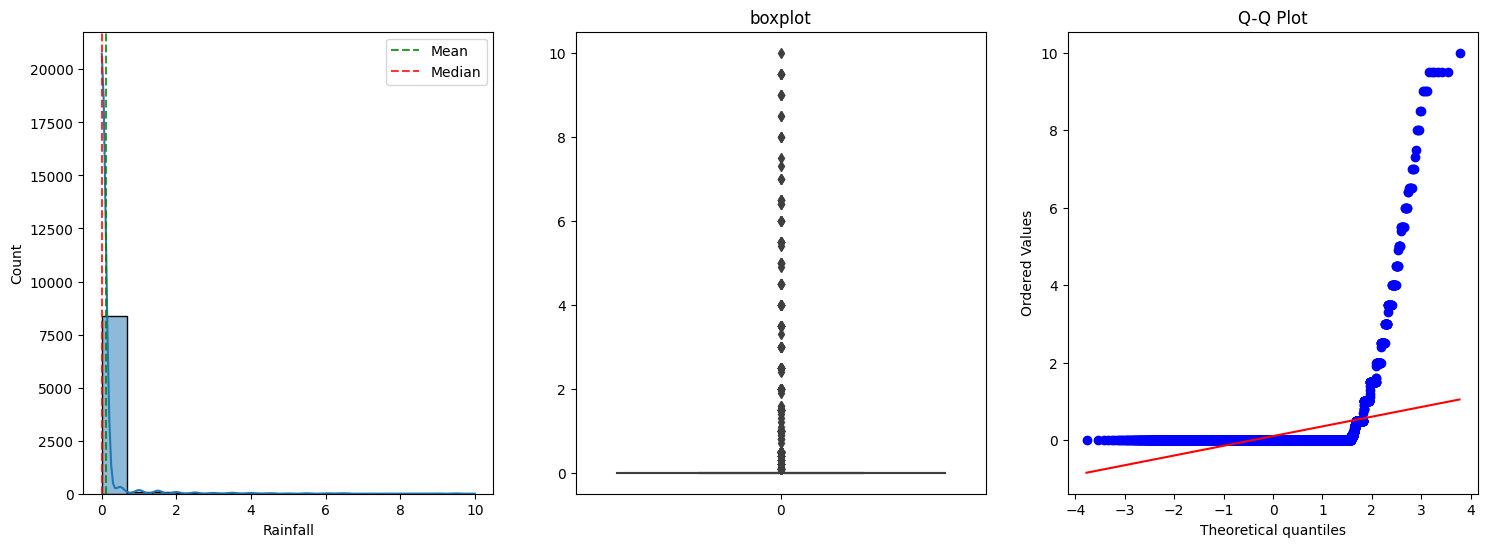

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


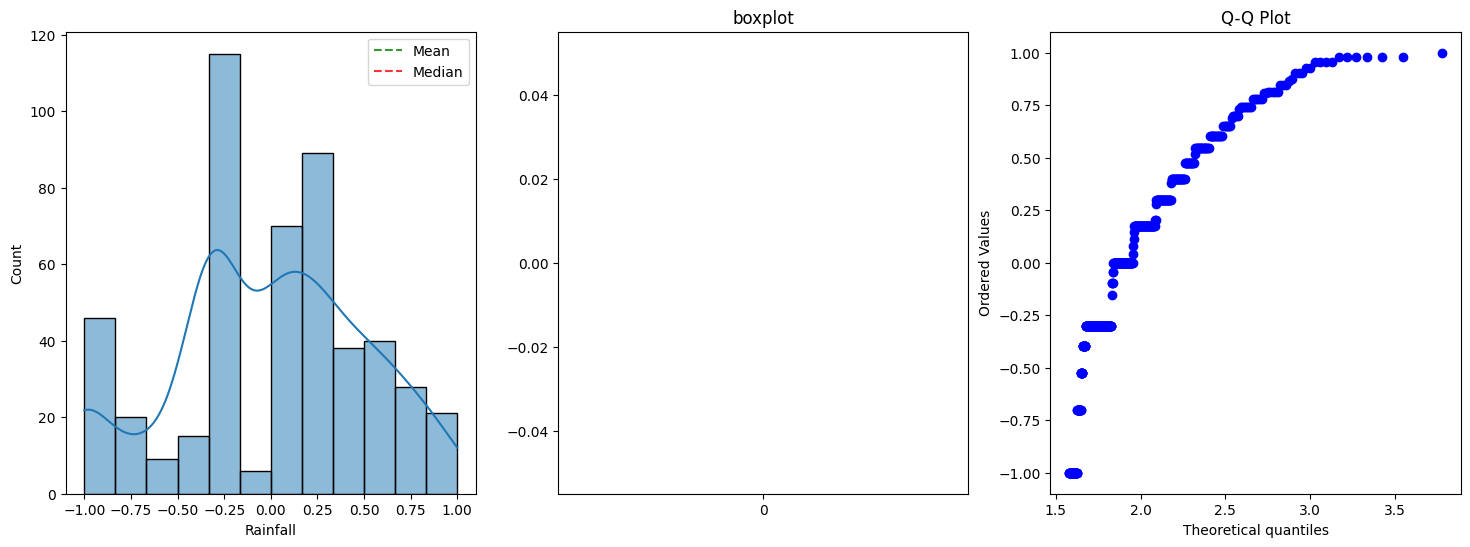

Square root transformation


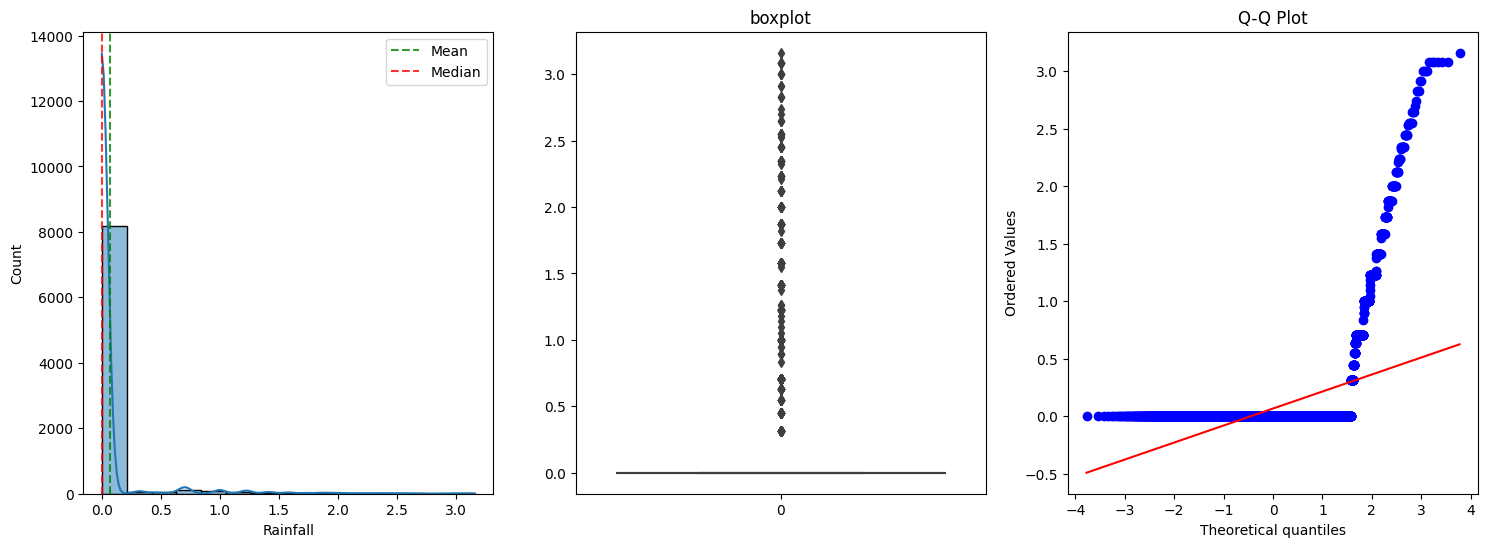

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


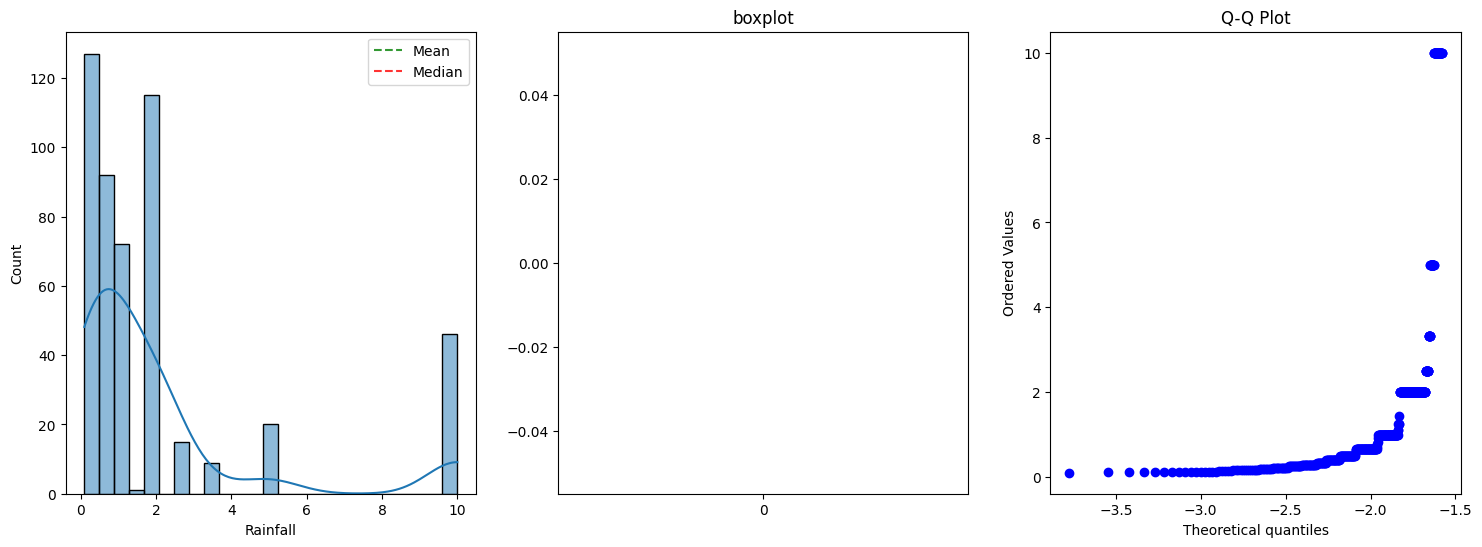

In [38]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Rainfall'
test_transformation(feat)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 8. Data Splitting

In [ ]:
X = df.iloc[:, 1:]
y = df['Rented Bike Count']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


What data splitting ratio have you used and why?

- We have used 0.2 splitting ratio. That means 80% of the data is used for training and 20% of the data is used for testing the model.

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling your data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

##### Import all libraries

In [ ]:
# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

##### Evaluation metrics

In [ ]:
# Visualizing evaluation Metric Score chart
def eval_metrics(model, X_train, y_train, X_test, y_test):

    # Predict on the model
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('train_score : ', train_score)
    print('test_score : ', test_score, '\n')

    # MSE
    MSE_train  = mean_squared_error(y_train, train_pred)
    MSE_test  = mean_squared_error(y_test, test_pred)
    print("MSE_train :" , MSE_train)
    print("MSE_test :" , MSE_test, '\n')

    #RMSE
    RMSE_train = np.sqrt(MSE_train)
    RMSE_test = np.sqrt(MSE_test)
    print("RMSE train :" ,RMSE_train)
    print("RMSE test :" ,RMSE_test, '\n')

    #r2_score
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    print("R2 train :" ,r2_train)
    print("R2 test :" ,r2_test, '\n')

    #Adjusted R2
    # print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



### **1. Linear regression**

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr_model = lr.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
eval_metrics(lr_model, X_train, y_train, X_test, y_test)

Xtrain :  0.5459534855394714
Xtest :  0.5381970991398355 

MSE_train : 188539.6461766703
MSE_test : 193274.9454237265 

RMSE train : 434.2115223904938
RMSE test : 439.6304646219669 

R2 train : 0.5459534855394714
R2 test : 0.5381970991398355 



In [ ]:
plt.figure(figsize=(25,5))
plt.plot(test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
eval_metrics(model, X_train_poly, y_train, X_test_poly, y_test)

train_score :  0.7238358945708494
test_score :  0.705866494647332 

MSE_train : 114675.2173313625
MSE_test : 123101.51601135184 

RMSE train : 338.63729465515536
RMSE test : 350.85825629640215 

R2 train : 0.7238358945708494
R2 test : 0.705866494647332 



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. Lasso**

In [ ]:
# lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

#fit the model
lasso_model = lasso.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(lasso_model, X_train, y_train, X_test, y_test)

train_score :  0.5459534855381494
test_score :  0.538197105084115 

MSE_train : 188539.64617721926
MSE_test : 193274.9429359112 

RMSE train : 434.2115223911259
RMSE test : 439.63046179252774 

R2 train : 0.5459534855381494
R2 test : 0.538197105084115 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

In [ ]:
eval_metrics(lasso_regressor, X_train, y_train, X_test, y_test)

train_score :  0.545952167666593
test_score :  0.5382015579809072 

MSE_train : 188540.19341418514
MSE_test : 193273.0792980196 

RMSE train : 434.2121525408808
RMSE test : 439.6283422369623 

R2 train : 0.545952167666593
R2 test : 0.5382015579809072 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **3. Ridge**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
eval_metrics(ridge, X_train, y_train, X_test, y_test)

train_score :  0.5459534680845481
test_score :  0.5381931086573016 

MSE_train : 188539.65342470535
MSE_test : 193276.6155308057 

RMSE train : 434.2115307366968
RMSE test : 439.6323640620714 

R2 train : 0.5459534680845481
R2 test : 0.5381931086573016 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
eval_metrics(ridge_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5459466364511855
test_score :  0.5381110084183134 

MSE_train : 188542.4902127788
MSE_test : 193310.97633533983 

RMSE train : 434.2147973213013
RMSE test : 439.6714413460804 

R2 train : 0.5459466364511855
R2 test : 0.5381110084183134 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **4. Elasticnet**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(elasticnet, X_train, y_train, X_test, y_test)

train_score :  0.544361231300738
test_score :  0.5353069020226506 

MSE_train : 189200.81863639236
MSE_test : 194484.558202354 

RMSE train : 434.97220444114856
RMSE test : 441.0040342245794 

R2 train : 0.544361231300738
R2 test : 0.5353069020226506 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
         'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

elastic_regressor = GridSearchCV(elastic, param, cv = 5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)


In [ ]:
eval_metrics(elastic_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5459132385896002
test_score :  0.5379634079332225 

MSE_train : 188556.35844170646
MSE_test : 193372.75047241716 

RMSE train : 434.2307663463132
RMSE test : 439.741686075379 

R2 train : 0.5459132385896002
R2 test : 0.5379634079332225 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **5. Decision tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_leaf_nodes=15, random_state = 20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=15, random_state=20)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(dtree, X_train, y_train, X_test, y_test)

train_score :  0.706384537500347
test_score :  0.6894267741707549 

MSE_train : 121921.77155562417
MSE_test : 129981.91037867492 

RMSE train : 349.172982281883
RMSE test : 360.53004088241374 

R2 train : 0.706384537500347
R2 test : 0.6894267741707549 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dtree = DecisionTreeRegressor()
params = {'max_leaf_nodes': [None, 10 , 20, 30],
          'max_depth': [None, 5, 7, 10, 20, 30],}

tree_regressor = GridSearchCV(dtree, params, cv = 5)

# Fit the Algorithm
tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 7, 10, 20, 30],
                         'max_leaf_nodes': [None, 10, 20, 30]})

In [ ]:
eval_metrics(tree_regressor, X_train, y_train, X_test, y_test)

train_score :  0.8974074860692082
test_score :  0.8131470442450874 

MSE_train : 42600.825379903064
MSE_test : 78202.18270289327 

RMSE train : 206.39967388516646
RMSE test : 279.64653171976454 

R2 train : 0.8974074860692082
R2 test : 0.8131470442450874 



In [ ]:
best_params = tree_regressor.best_params_
best_params

{'max_depth': 10, 'max_leaf_nodes': None}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **6. Random forest**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **7. XGBoost**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***